## Plot Heartattack vs. no heartattack ECGs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import stats
import pandas as pd
import numpy as np
from tqdm import tqdm

In [32]:
test_df = pd.read_csv("/home/ngsci/project/NEJM_benchmark/all_ids_labels_tested_with_covars_all_final_cath.csv")

#'has_depress', 'has_st_eleva', 'has_twave_inver', 'has_twave_abnormal'
print(heartattack_df.columns)

heartattack_df = test_df[test_df['stent_or_cabg_010_day']==1]
heartattack_df_ste_std_twi = heartattack_df[((heartattack_df['has_depress']==1) | (heartattack_df['has_st_eleva']==1) | (heartattack_df['has_twave_inver']==1))]

heartattack_df_no_ste_std_twi = heartattack_df[~((heartattack_df['has_depress']==1) | (heartattack_df['has_st_eleva']==1) | (heartattack_df['has_twave_inver']==1) | (heartattack_df['has_twave_abnormal']==1))]

no_heartattack_df = test_df[test_df['stent_or_cabg_010_day']==0]
no_heartattack_df_ste_std_twi = no_heartattack_df[((no_heartattack_df['has_depress']==1) | (no_heartattack_df['has_st_eleva']==1) | (no_heartattack_df['has_twave_inver']==1))]

no_heartattack_df_no_ste_std_twi = no_heartattack_df[~((no_heartattack_df['has_depress']==1) | (no_heartattack_df['has_st_eleva']==1) | (no_heartattack_df['has_twave_inver']==1) | (no_heartattack_df['has_twave_abnormal']==1))]

# heartattack_df_ids = test_df[test_df['stent_or_cabg_010_day']==1]['ecg_id_new'].tolist()[10:12]
# no_heartattack_df_ids = test_df[test_df['stent_or_cabg_010_day']==0]['ecg_id_new'].tolist()[10:12]

heartattack_df_ste_std_twi_ids = heartattack_df_ste_std_twi['ecg_id_new'].tolist()[10:25]
heartattack_df_no_ste_std_twi_ids = heartattack_df_no_ste_std_twi['ecg_id_new'].tolist()[10:25]
no_heartattack_df_ste_std_twi_ids = no_heartattack_df_ste_std_twi['ecg_id_new'].tolist()[10:25]
no_heartattack_df_no_ste_std_twi_ids = no_heartattack_df_no_ste_std_twi['ecg_id_new'].tolist()[10:25]

Index(['Unnamed: 0', 'patient_ngsci_id', 'ecg_id', 'date', 'p-r-t_axes',
       'p_axes', 'r_axes', 't_axes', 'pr_interval', 'pr_interval_units',
       'qrs_duration', 'qrs_duration_units', 'qtqtc', 'qt_interval',
       'qt_interval_units', 'qtc_interval', 'qtc_interval_units', 'vent_rate',
       'vent_rate_units', 'has_bbb', 'has_afib', 'has_st', 'has_pacemaker',
       'has_lvh', 'has_normal', 'has_normal_ecg', 'has_normal_sinus',
       'has_depress', 'has_st_eleva', 'has_twave', 'has_aberran_bbb',
       'has_jpoint_repol', 'has_jpoint_eleva', 'has_twave_inver',
       'has_twave_abnormal', 'has_nonspecific', 'has_rhythm_disturbance',
       'has_prolonged_qt', 'has_lead_reversal', 'has_poor_or_quality',
       'ecg_id_new', 'ed_enc_id', 'start_datetime', 'end_datetime',
       'age_at_admit', 'macetrop_030_pos', 'death_030_day',
       'macetrop_pos_or_death_030', 'stent_010_day', 'cabg_010_day',
       'stent_or_cabg_010_day', 'ami_day_of', 'days_to_ami', 'maxtrop_sameday',
  

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import stats

def plot_leads_as_on_pdf_new(arr):
    short_lead_arr = arr[:12]
    short_lead_labels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 
                         'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

    fig, axs = plt.subplots(3, 1, figsize=(10, 5))

    for i in range(3):
        row_leads = short_lead_arr[i::3]
        row_labels = short_lead_labels[i::3]

        processed_leads = []
        valid_labels = []

        for lead, label in zip(row_leads, row_labels):
            # Remove NaNs
            lead_without_nan = lead[~np.isnan(lead)]
            if len(lead_without_nan) == 0:
                # No valid data in this lead, skip it
                continue

            # Baseline correction
            mode_value = stats.mode(lead_without_nan, nan_policy='omit')[0][0]
            lead_corrected = lead - mode_value
            lead_corrected = np.nan_to_num(lead_corrected, nan=0)

            # Remove leading/trailing zeros that represent missing data
            nonzero_indices = np.where(lead_corrected != 0)[0]
            if len(nonzero_indices) > 0:
                lead_corrected = lead_corrected[nonzero_indices[0]:nonzero_indices[-1]+1]
            else:
                # All zeros, skip this lead
                continue

            processed_leads.append(lead_corrected)
            valid_labels.append(label)

        # Concatenate all processed leads for this row
        if len(processed_leads) == 0:
            # No leads to plot in this row
            continue

        concatenated = np.concatenate(processed_leads)
        axs[i].plot(concatenated, color='black')

        # Add vertical lines and annotations
        current_pos = 0
        for j, label in enumerate(valid_labels):
            seg_length = len(processed_leads[j])
            lead_midpoint = current_pos + seg_length / 2.0

            # Add text annotation
            axs[i].text(lead_midpoint, 1.2, label, color='black', 
                        ha='center', va='bottom', fontsize=10)

            # Draw vertical line after each segment except the last
            if j < len(valid_labels) - 1:
                boundary_pos = current_pos + seg_length
                axs[i].axvline(x=boundary_pos, color='black', linestyle='-', linewidth=1)

            current_pos += seg_length

        # Customize ECG-like grid
        axs[i].set_ylim(-1.6, 1.6)
        axs[i].xaxis.set_major_locator(MultipleLocator(100))
        axs[i].yaxis.set_major_locator(MultipleLocator(0.5))

        axs[i].xaxis.set_minor_locator(MultipleLocator(20))
        axs[i].yaxis.set_minor_locator(MultipleLocator(0.1))

        axs[i].grid(which='major', color='red', linestyle='-', linewidth=0.5)
        axs[i].grid(which='minor', color='red', linestyle='-', linewidth=0.2)
        axs[i].set_facecolor('white')

        # Hide x-axis labels if desired
        axs[i].tick_params(axis='x', which='major', labelbottom=False)
        axs[i].tick_params(axis='x', which='minor', labelbottom=False)

    plt.tight_layout()
    plt.show()


In [13]:
# 

# def plot_leads_as_on_pdf_new(arr):
#     short_lead_arr = arr[:12]
#     # Initialize the output array
#     ecg = np.zeros((3, 5000))

#     for i in range(3):
#         for lead in short_lead_arr[i::3]:
#             lead_without_nan = lead[~np.isnan(lead)]
#             mode_value = stats.mode(lead_without_nan, nan_policy='omit')[0][0]
#             lead = lead - mode_value
#             lead = np.nan_to_num(lead, nan=0)
#             ecg[i] += lead

#     short_lead_labels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 
#                          'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

#     # Set up plot
#     fig, axs = plt.subplots(3, 1, figsize=(10, 5))
    
#     # Short leads
#     for i in range(3):
#         for lead, label in zip(short_lead_arr[i::3], short_lead_labels[i::3]):
#             lead_without_nan = lead[~np.isnan(lead)]
#             mode_value = stats.mode(lead_without_nan, nan_policy='omit')[0][0]
#             lead = lead - mode_value
#             axs[i].plot(lead, label=label)

#     # Customize gridlines to mimic ECG paper
#     for ax in axs:
#         ax.set_ylim(-1.6, 1.6)    # Replace -2 and 2 with your desired y-axis limits
#         # Set the major ticks (every 0.2 seconds assuming a sampling rate)
#         ax.xaxis.set_major_locator(MultipleLocator(100))
#         ax.yaxis.set_major_locator(MultipleLocator(0.5))

#         # Set the minor ticks (every 0.04 seconds)
#         ax.xaxis.set_minor_locator(MultipleLocator(20))
#         ax.yaxis.set_minor_locator(MultipleLocator(0.1))

#         # Customize the grid
#         ax.grid(which='major', color='red', linestyle='-', linewidth=0.5)
#         ax.grid(which='minor', color='red', linestyle='-', linewidth=0.2)

#         # Set background color to white
#         ax.set_facecolor('white')
        
#         # Place legend outside the plot area
#         ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)
#         # ax.legend(loc='upper left')
        
#         # Only show labels on major x-axis ticks (every second)
#         ax.tick_params(axis='x', which='major', labelbottom=False) #labelsize=8,
#         ax.tick_params(axis='x', which='minor', labelbottom=False)

#     plt.tight_layout()
#     plt.show()

ACS with ECG feature
421d35a812.npy


/tmp/ipykernel_478/3028554213.py:28: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(lead_without_nan, nan_policy='omit')[0][0]


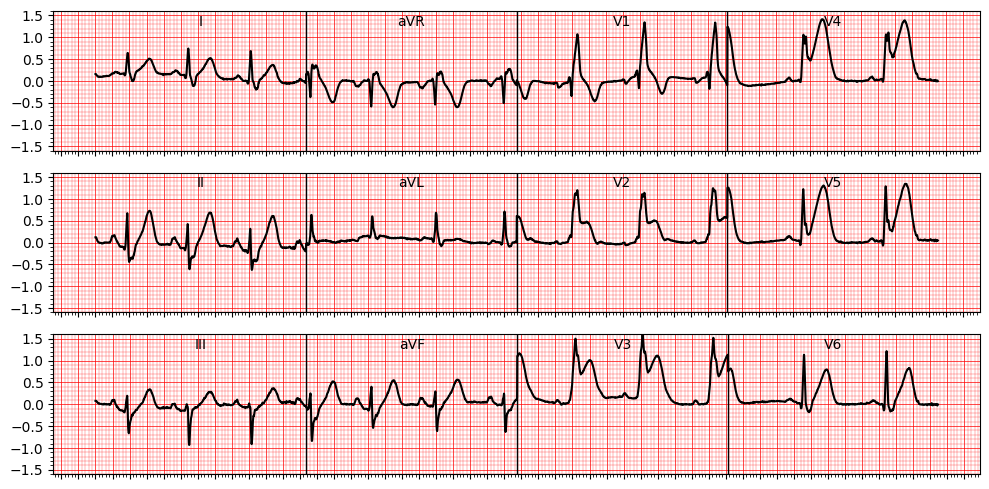


#####################################################################

0d6f8d10b7.npy


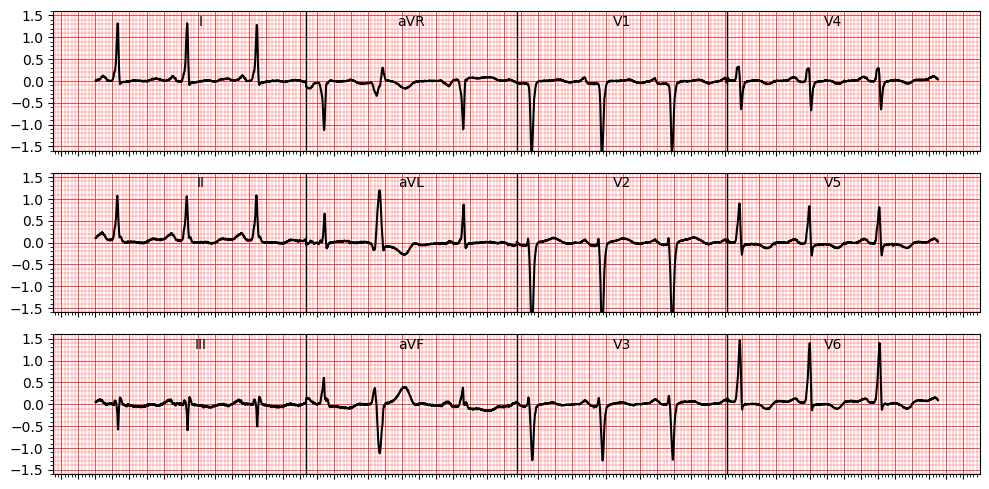


#####################################################################

d6906626d2.npy


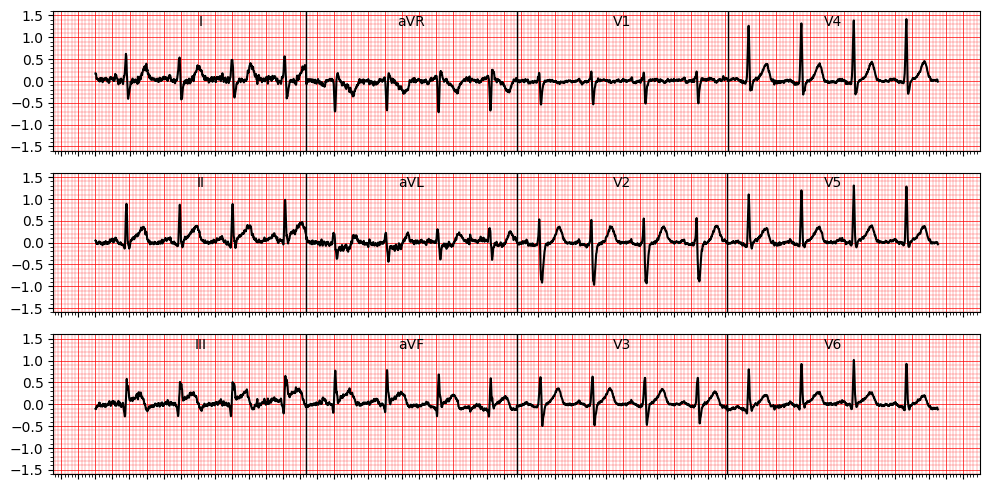


#####################################################################

90ff5be554.npy


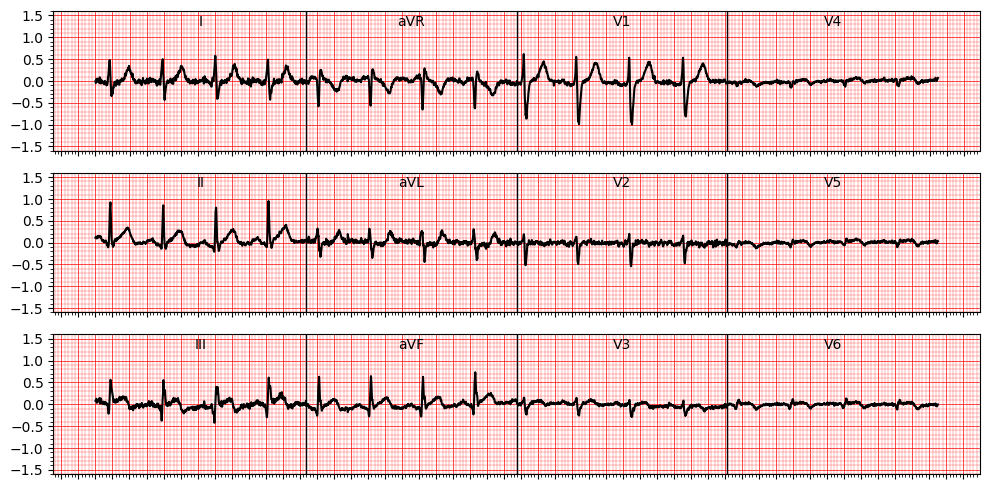


#####################################################################

1cb5bd4123.npy


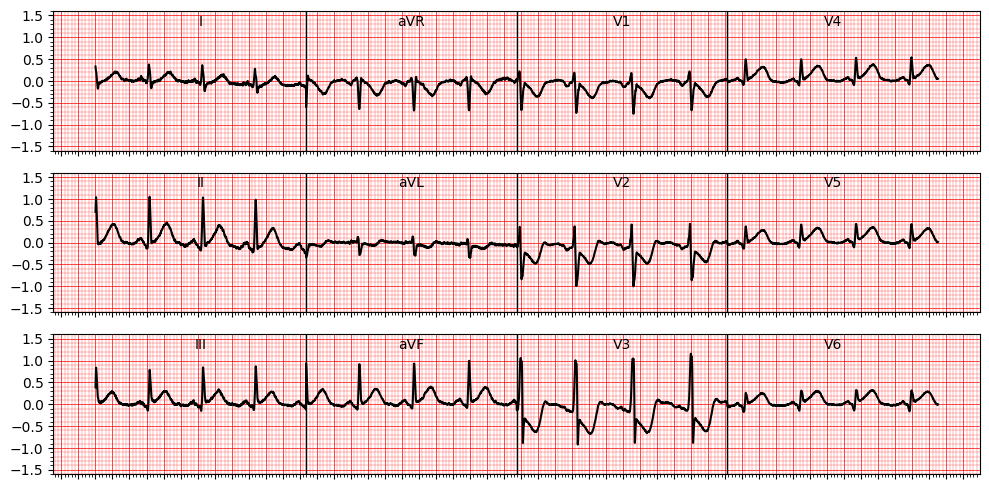


#####################################################################

0ac66f277b.npy


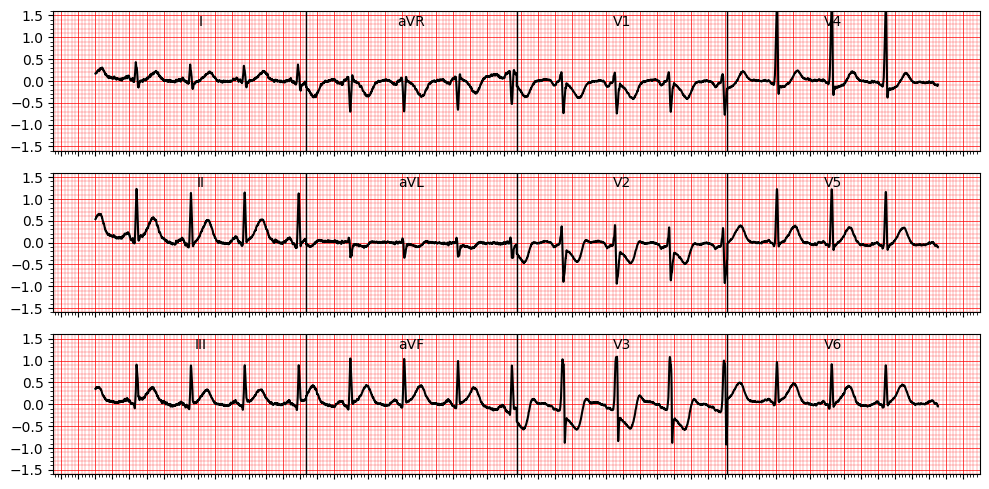


#####################################################################

5c6246f999.npy


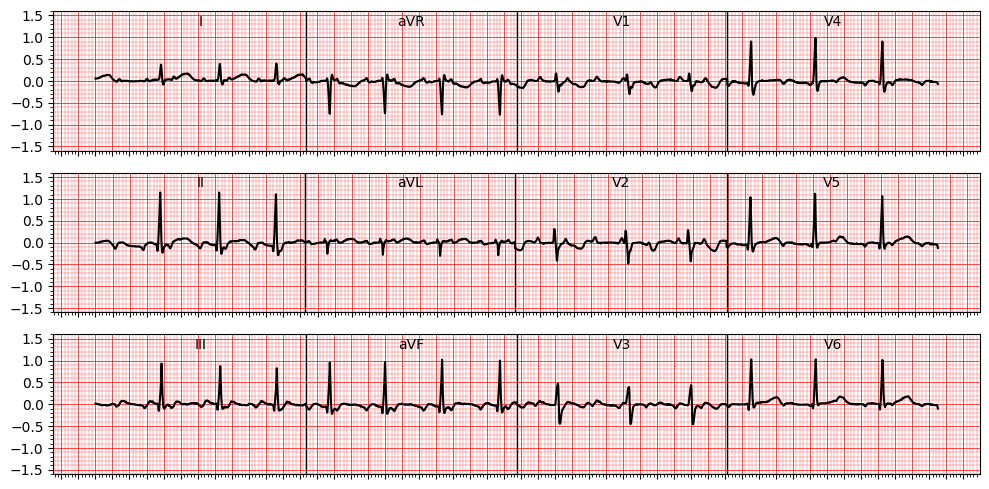


#####################################################################

934e369a95.npy


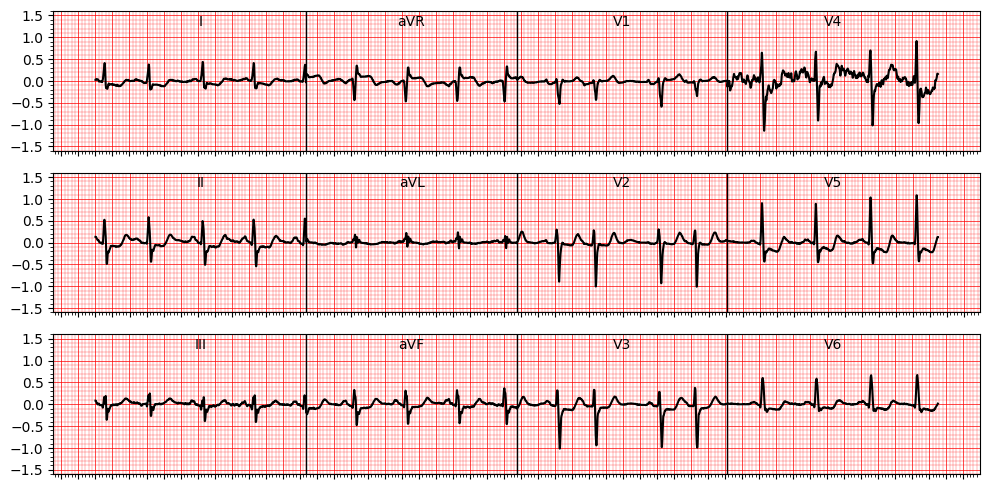


#####################################################################

389ce5b1c9.npy


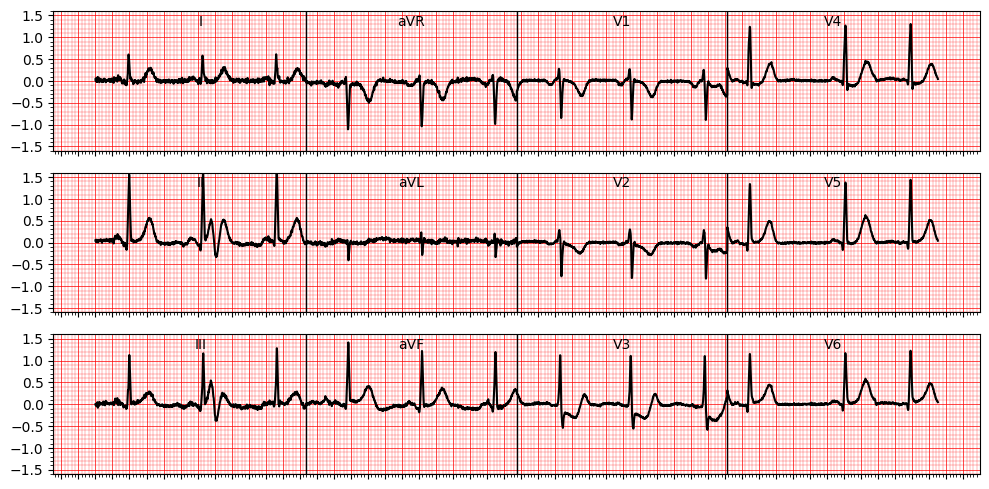


#####################################################################

7a6e15fe6e.npy


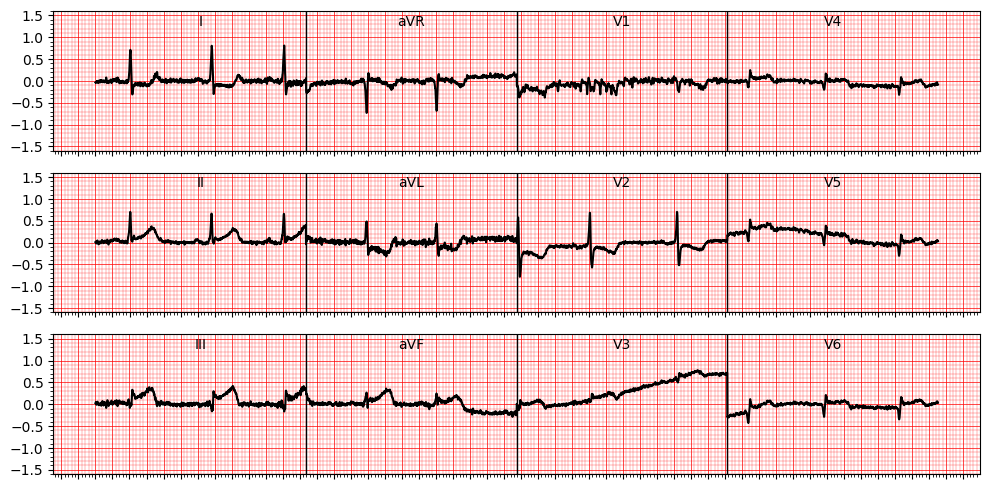


#####################################################################



In [28]:
# Load the npz file

# heartattack_df_ste_std_twi_ids = heartattack_df_ste_std_twi['ecg_id_new'].tolist()[10:12]
# heartattack_df_no_ste_std_twi_ids = heartattack_df_no_ste_std_twi['ecg_id_new'].tolist()[10:12]
# no_heartattack_df_ste_std_twi_ids = no_heartattack_df_ste_std_twi['ecg_id_new'].tolist()[10:12]
# no_heartattack_df_no_ste_std_twi_ids = no_heartattack_df_no_ste_std_twi['ecg_id_new'].tolist()[10:12]

print('ACS with ECG feature')

for id_data in heartattack_df_ste_std_twi_ids:
    print(id_data)
    prefix = id_data[:2]
    id_data = id_data[:-4]
    arr = np.load(f'/home/ngsci/datasets/ed-bwh-ecg/v1/ecg-waveforms-npz/{prefix}/{id_data}.npz') #.npz #00385e09ac.npz #00177a731b.npz
    array_name = arr.files[0]  # Example: getting the first array name
    data = arr[array_name]
    plot_leads_as_on_pdf_new(data)
    print()
    print('#####################################################################')
    print()

ACS without ECG feature
a6cfdf599b.npy


/tmp/ipykernel_478/3028554213.py:28: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(lead_without_nan, nan_policy='omit')[0][0]


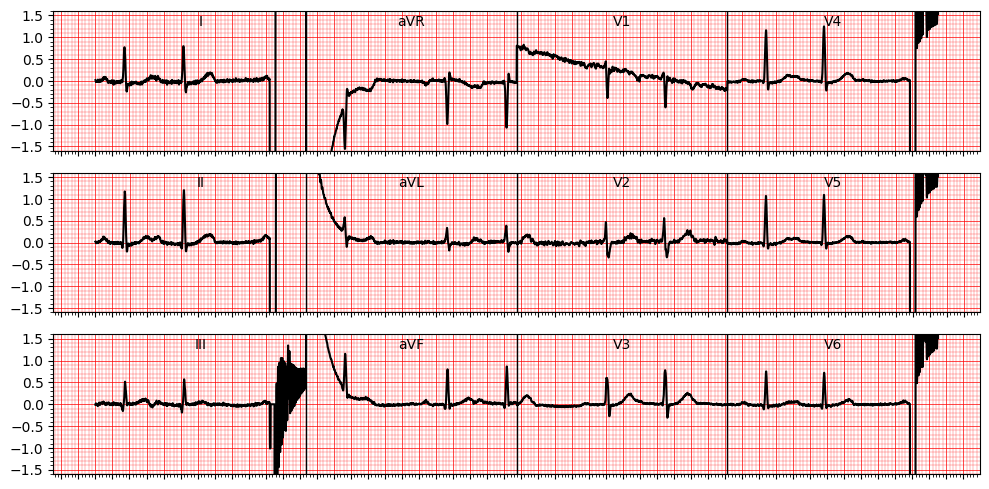


#####################################################################

534be5d946.npy


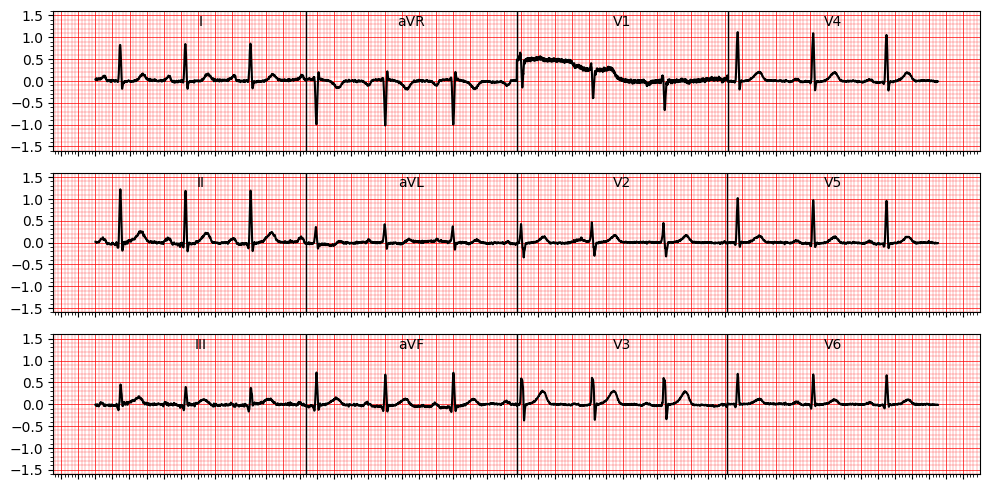


#####################################################################

b339e18274.npy


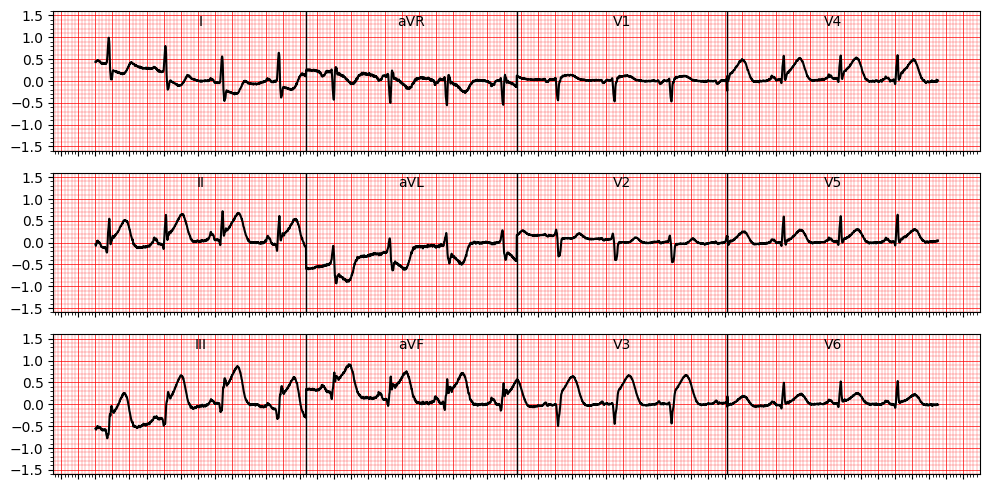


#####################################################################

680e13af8b.npy


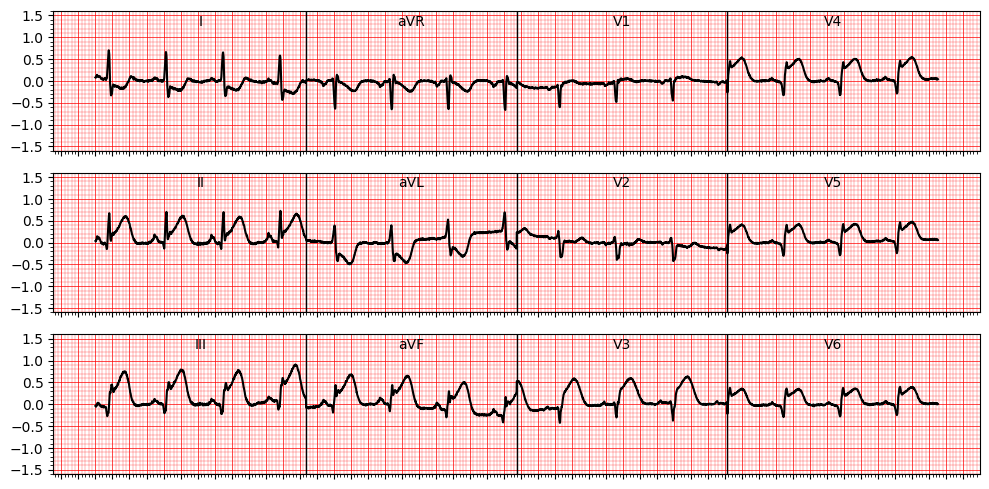


#####################################################################

a4d1577cbc.npy


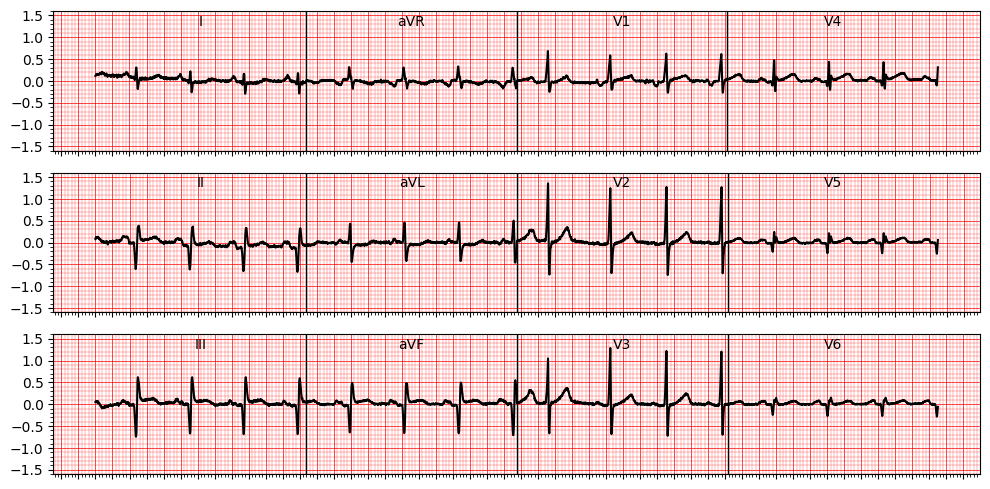


#####################################################################

0eb3543735.npy


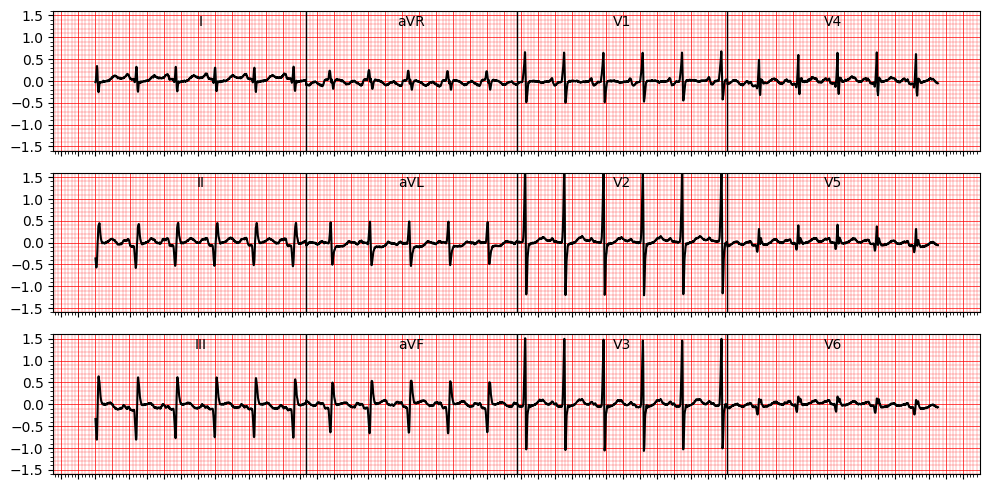


#####################################################################

ecba87f997.npy


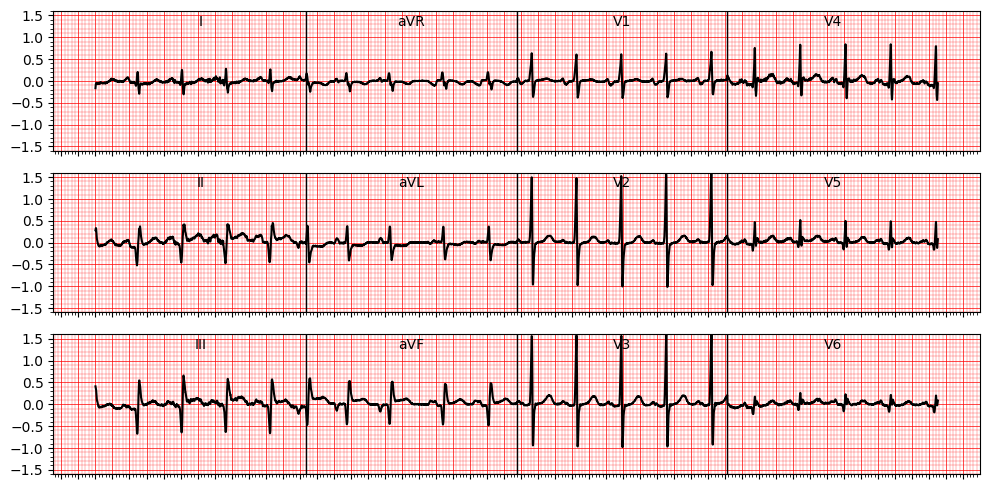


#####################################################################

eb89a3fa5b.npy


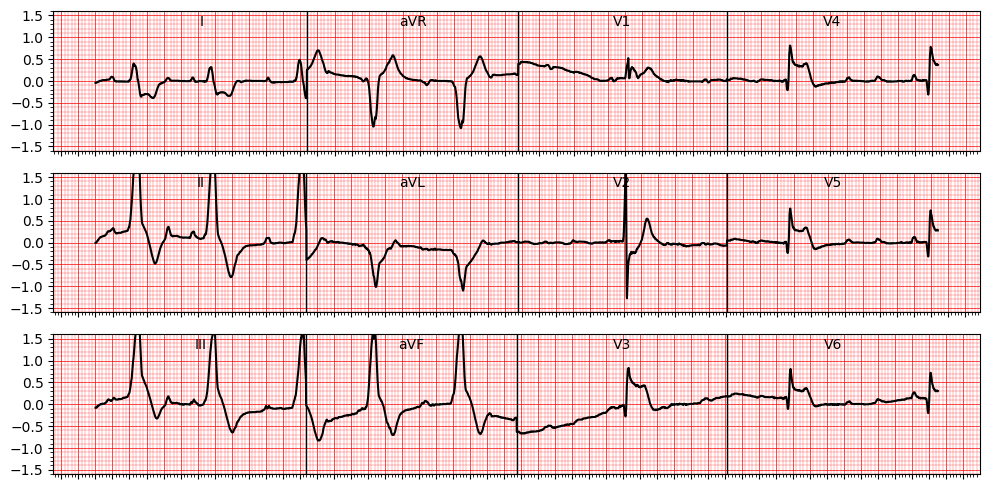


#####################################################################

2f15810869.npy


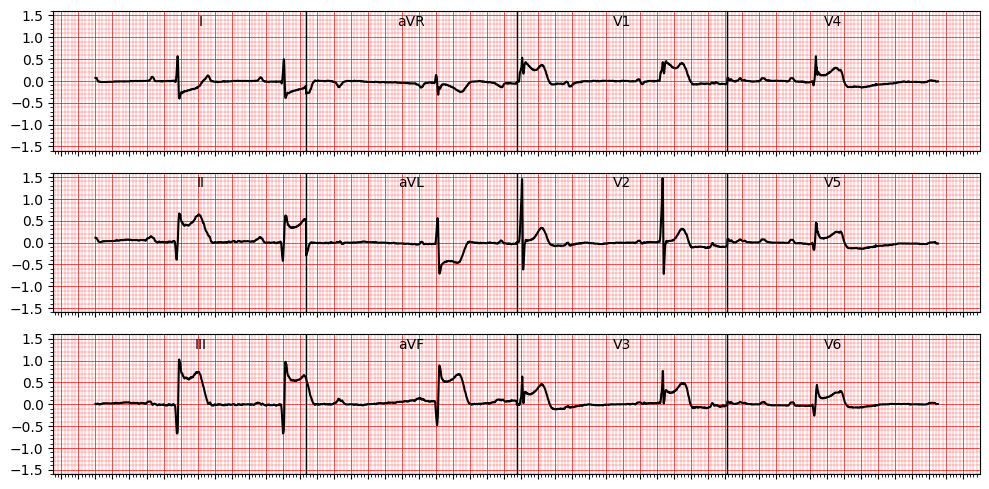


#####################################################################

2e613061c7.npy


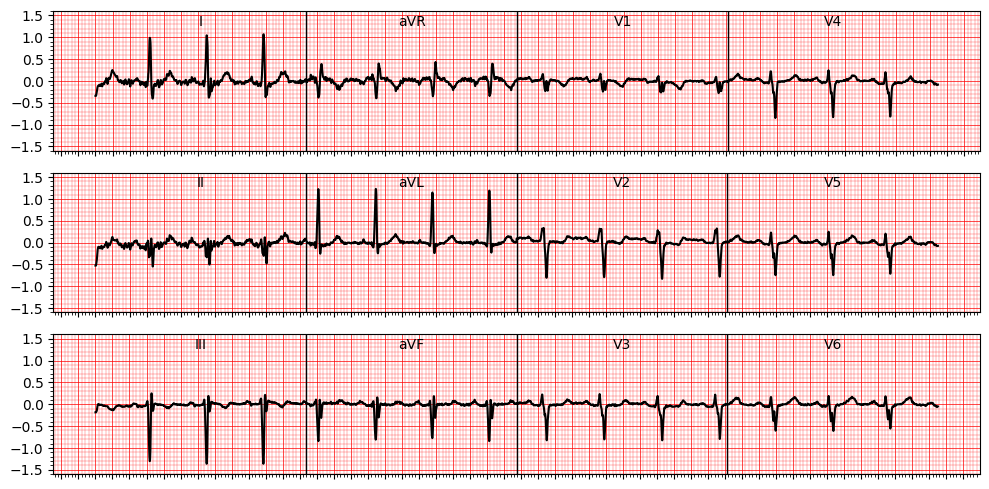


#####################################################################



In [29]:
print('ACS without ECG feature')

for id_data in heartattack_df_no_ste_std_twi_ids:
    print(id_data)
    prefix = id_data[:2]
    id_data = id_data[:-4]
    arr = np.load(f'/home/ngsci/datasets/ed-bwh-ecg/v1/ecg-waveforms-npz/{prefix}/{id_data}.npz') #.npz #00385e09ac.npz #00177a731b.npz
    array_name = arr.files[0]  # Example: getting the first array name
    data = arr[array_name]
    plot_leads_as_on_pdf_new(data)
    print()
    print('#####################################################################')
    print()

No ACS with ECG feature
7f017d2c70.npy


/tmp/ipykernel_478/3028554213.py:28: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(lead_without_nan, nan_policy='omit')[0][0]


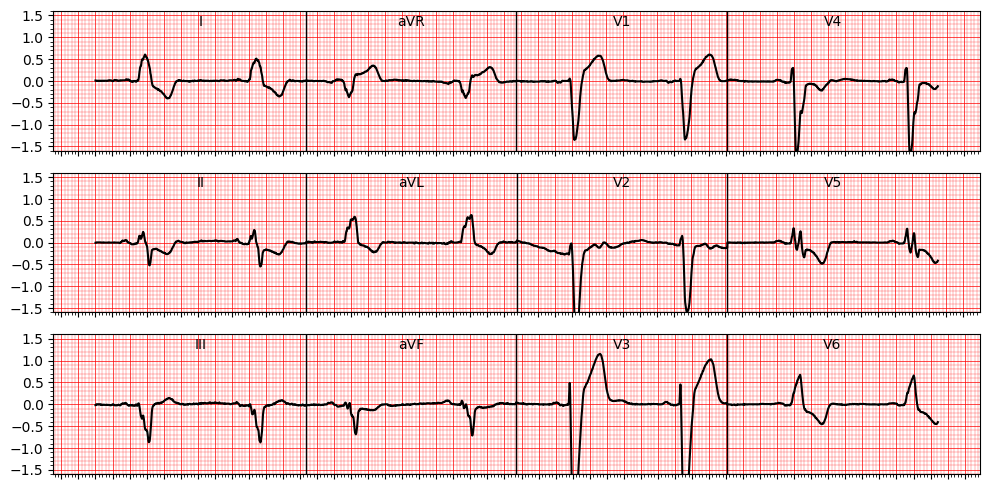


#####################################################################

0dad9c2b33.npy


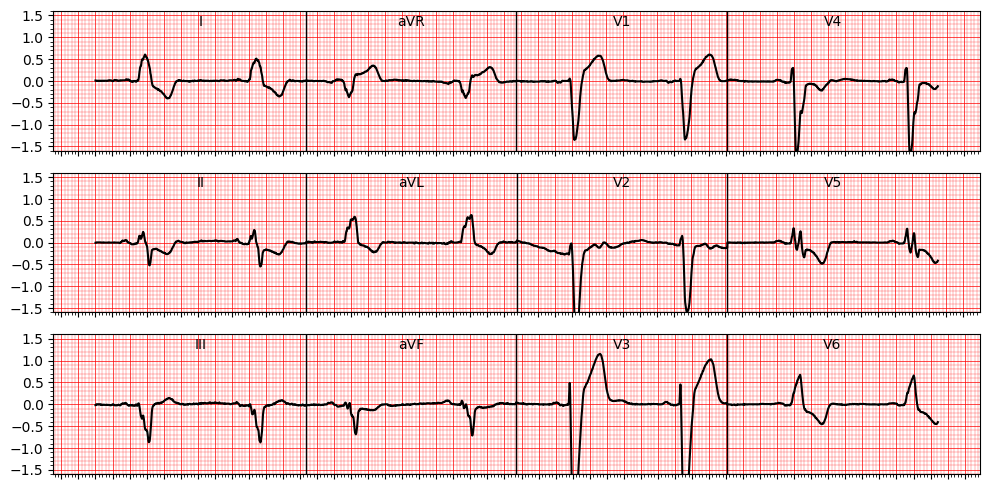


#####################################################################

b86d833c2c.npy


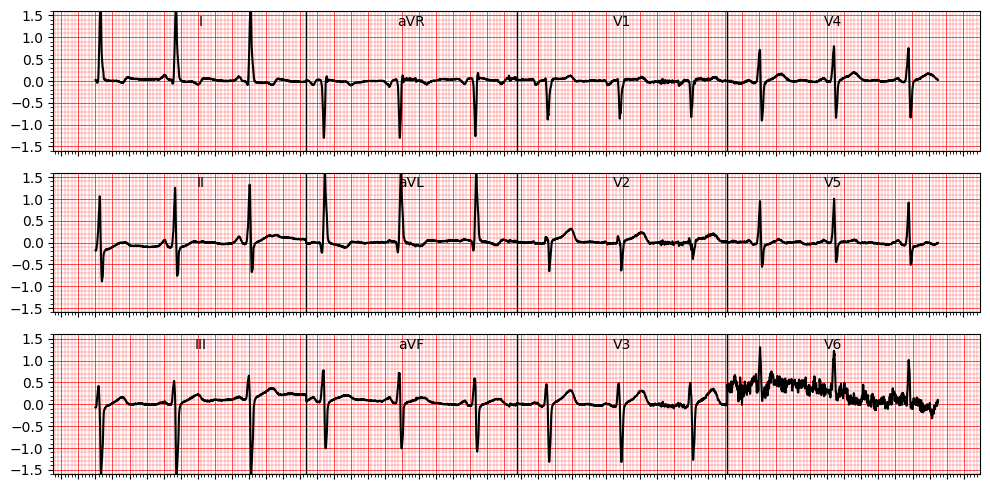


#####################################################################

12c72177ba.npy


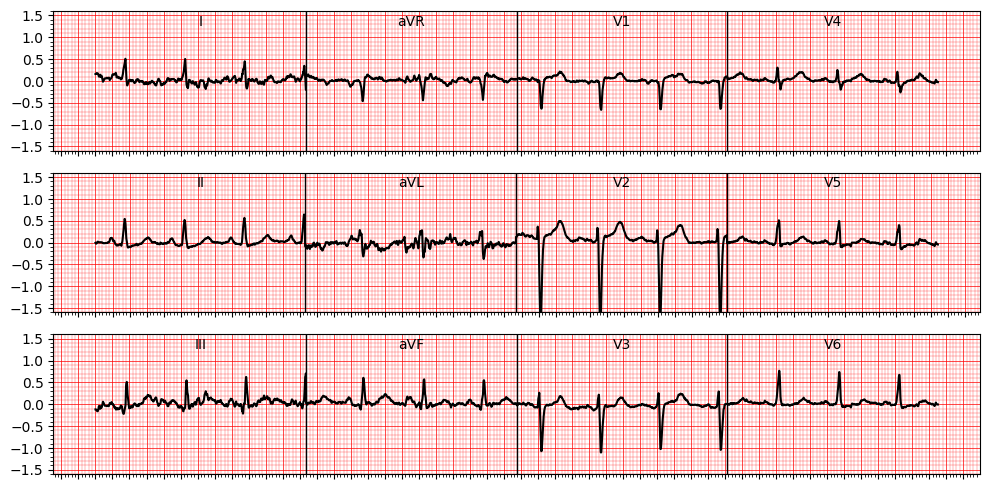


#####################################################################

7513ed6e63.npy


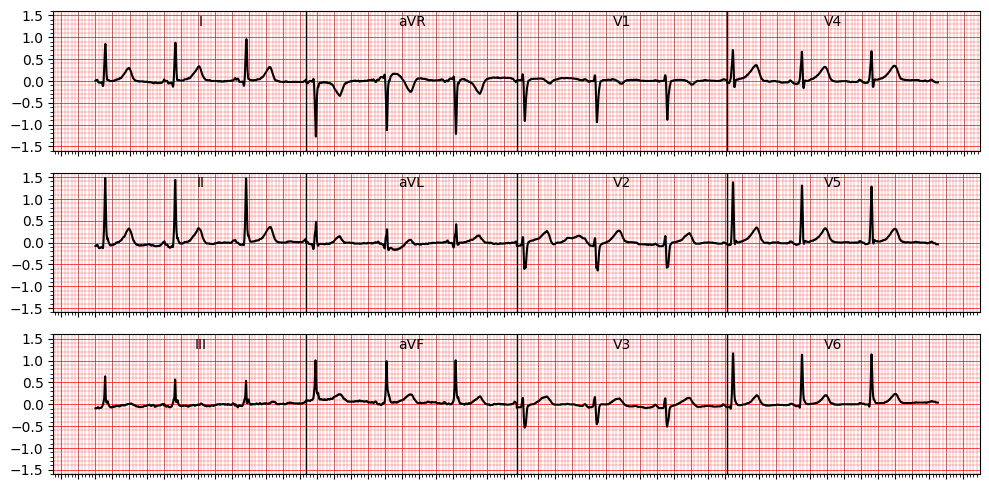


#####################################################################

95b4cfdd9f.npy


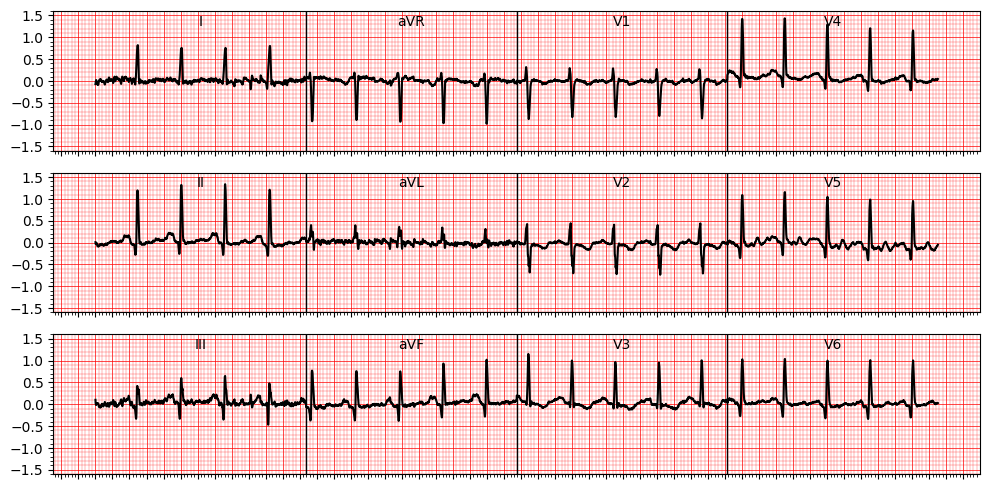


#####################################################################

97cc600ba2.npy


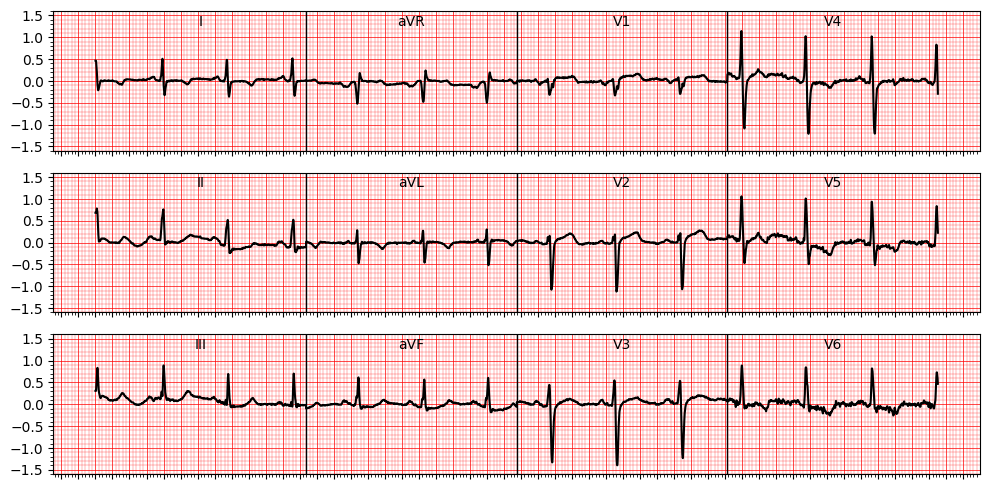


#####################################################################

d825fd2b97.npy


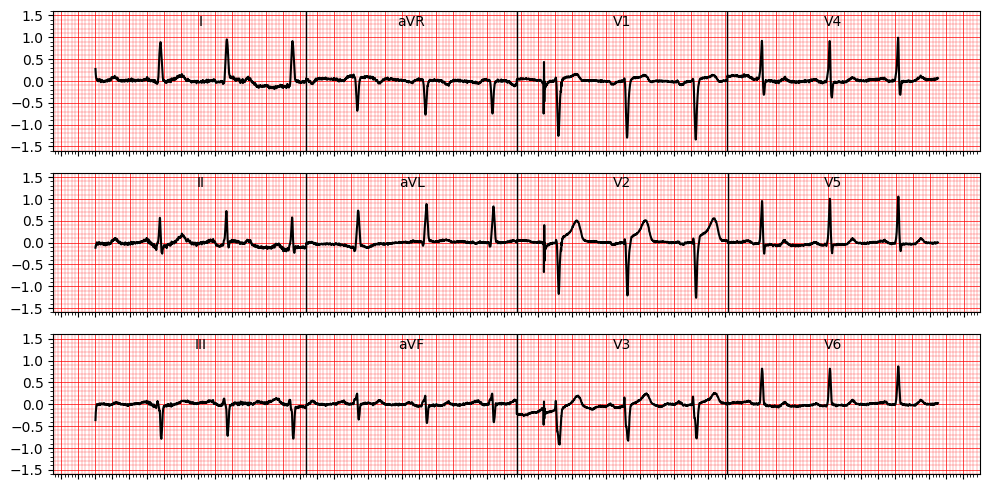


#####################################################################

88e7cdb39c.npy


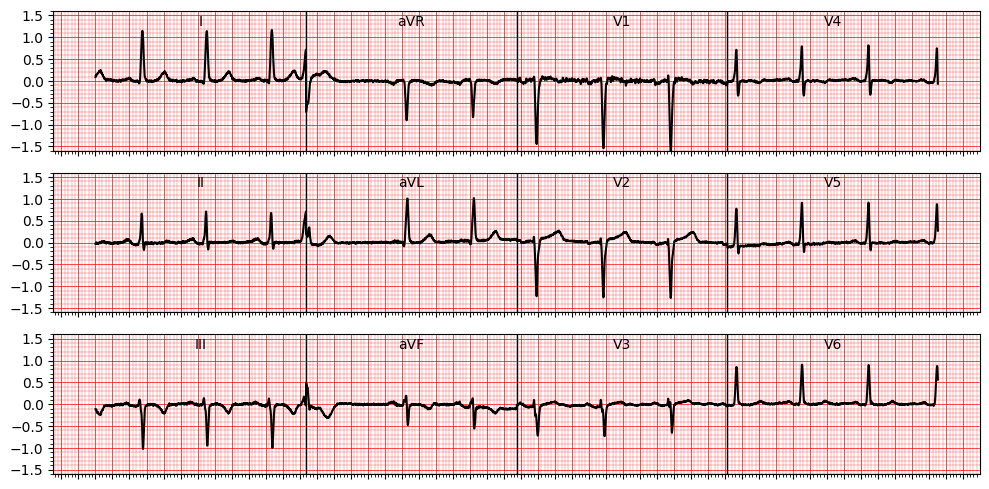


#####################################################################

92a6d0a746.npy


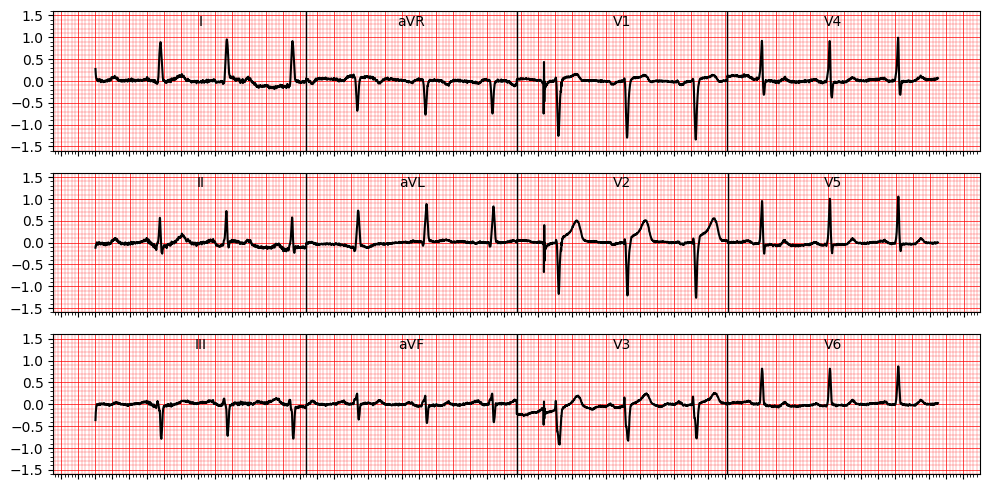


#####################################################################

2859cc514c.npy


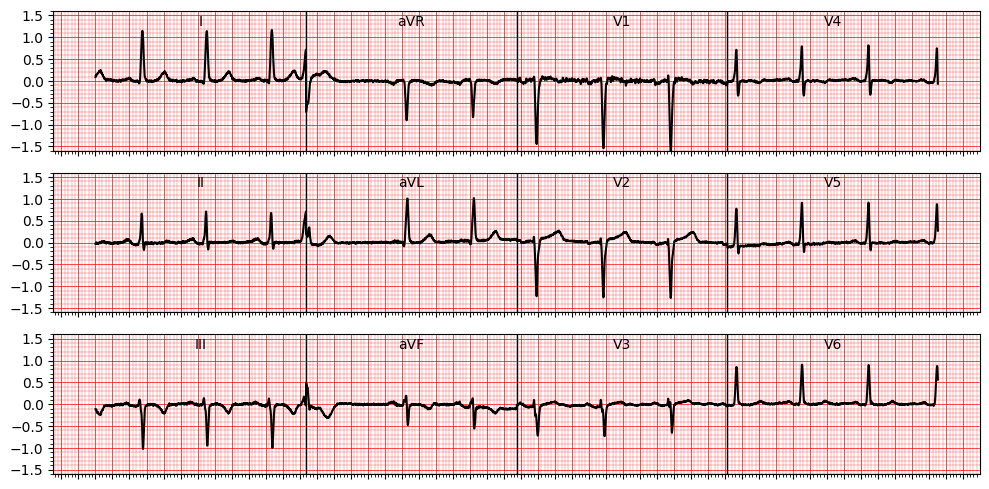


#####################################################################

116bc80437.npy


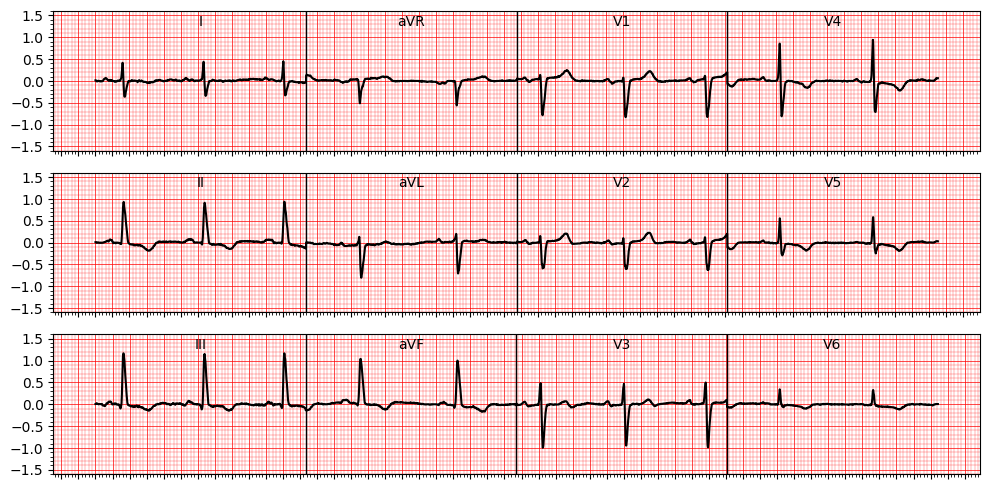


#####################################################################

30f53233f2.npy


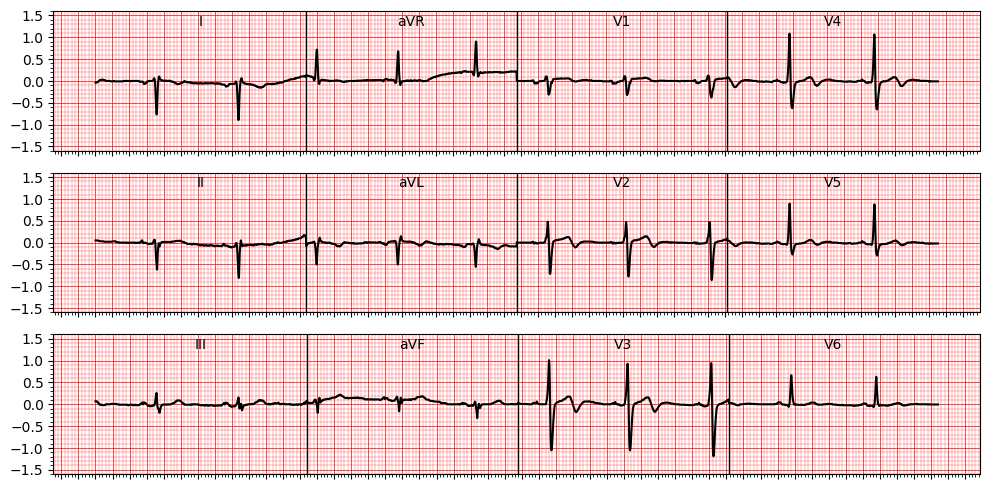


#####################################################################

f4541a4830.npy


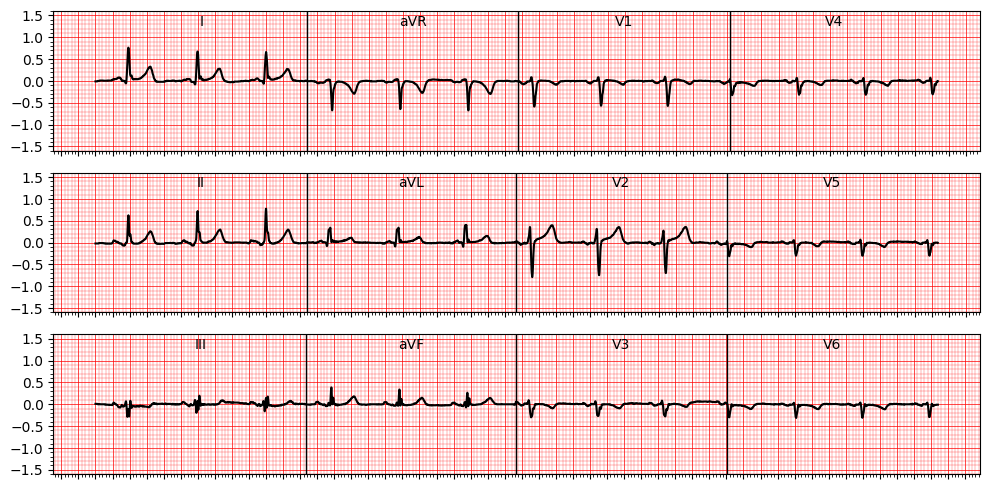


#####################################################################

1c2f01acfd.npy


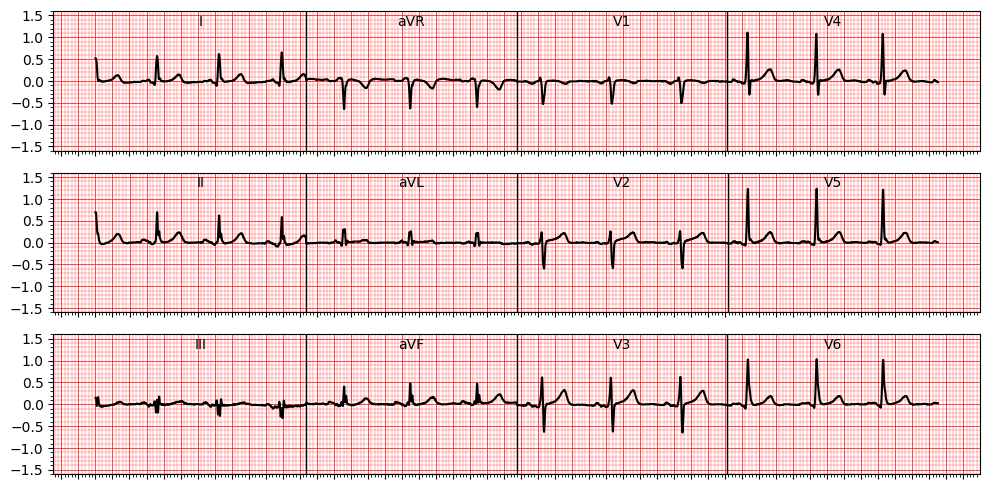


#####################################################################



In [33]:
# heartattack_df_ste_std_twi_ids = heartattack_df_ste_std_twi['ecg_id_new'].tolist()[10:12]
# heartattack_df_no_ste_std_twi_ids = heartattack_df_no_ste_std_twi['ecg_id_new'].tolist()[10:12]
# no_heartattack_df_ste_std_twi_ids = no_heartattack_df_ste_std_twi['ecg_id_new'].tolist()[10:12]
# no_heartattack_df_no_ste_std_twi_ids = no_heartattack_df_no_ste_std_twi['ecg_id_new'].tolist()[10:12]

print('No ACS with ECG feature')

for id_data in no_heartattack_df_ste_std_twi_ids:
    print(id_data)
    prefix = id_data[:2]
    id_data = id_data[:-4]
    arr = np.load(f'/home/ngsci/datasets/ed-bwh-ecg/v1/ecg-waveforms-npz/{prefix}/{id_data}.npz') #.npz #00385e09ac.npz #00177a731b.npz
    array_name = arr.files[0]  # Example: getting the first array name
    data = arr[array_name]
    plot_leads_as_on_pdf_new(data)
    print()
    print('#####################################################################')
    print()

No ACS with ECG feature
91b9417b81.npy


/tmp/ipykernel_478/3028554213.py:28: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(lead_without_nan, nan_policy='omit')[0][0]


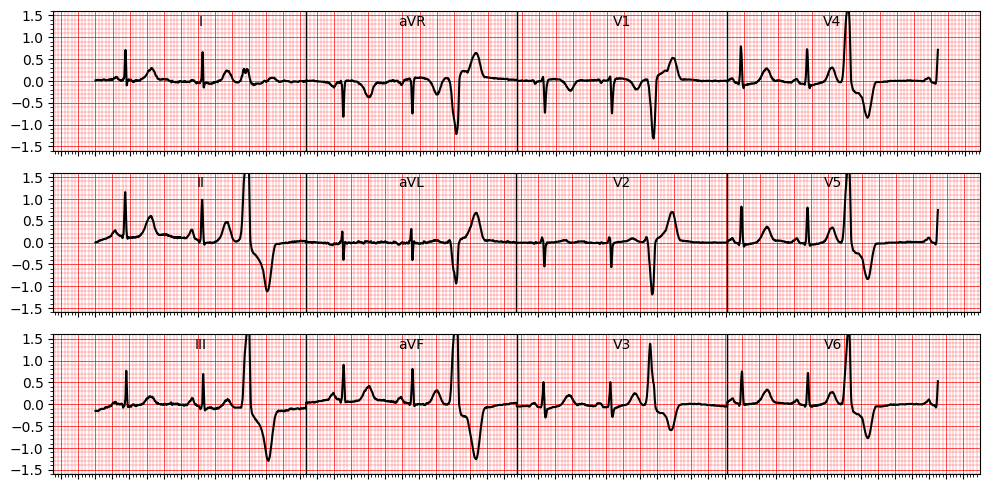


#####################################################################

605cc2a0a8.npy


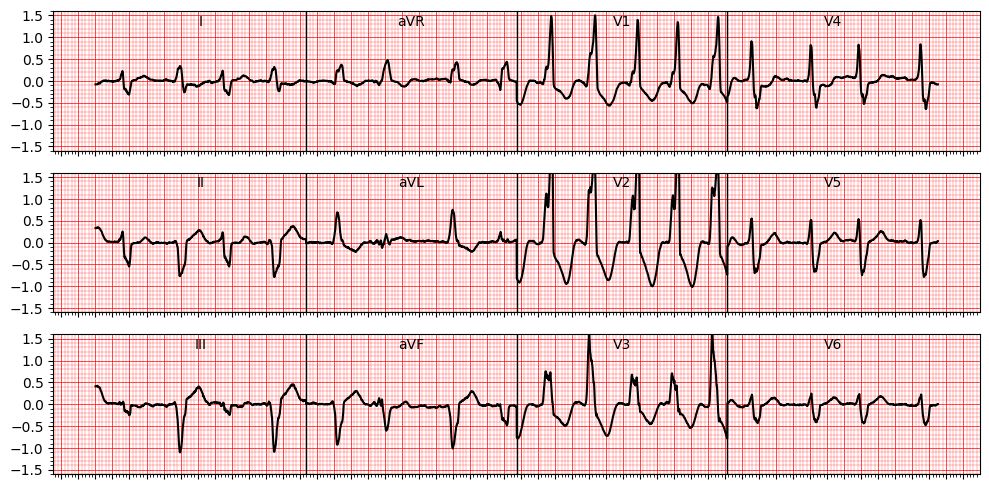


#####################################################################

03dd729b1e.npy


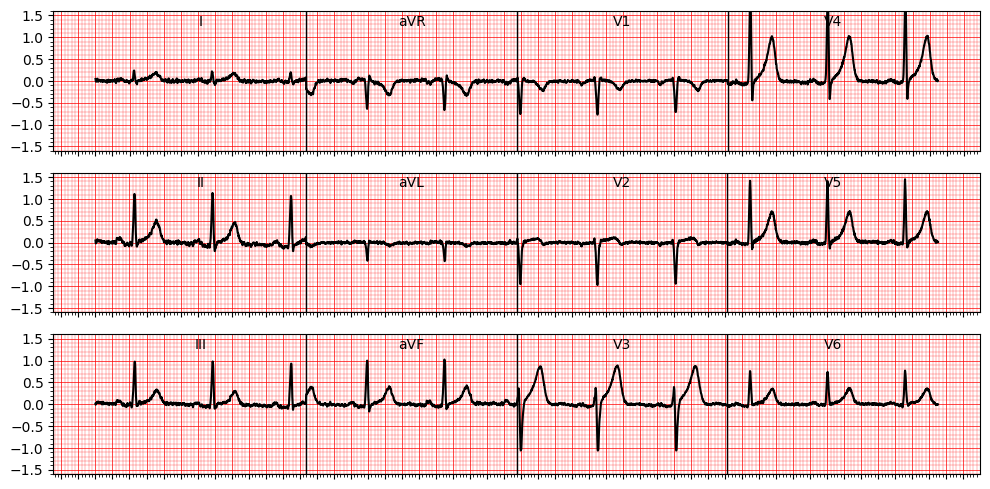


#####################################################################

7a106a3110.npy


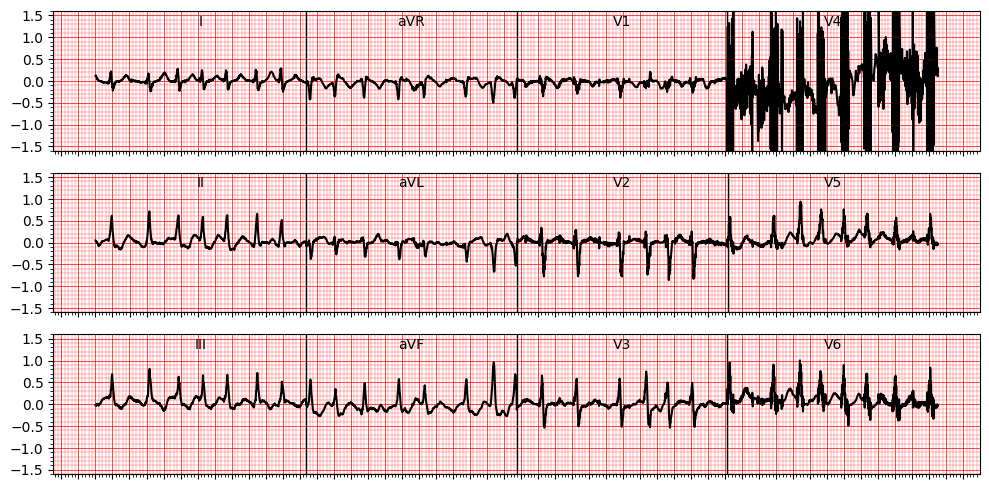


#####################################################################

b9310b5abb.npy


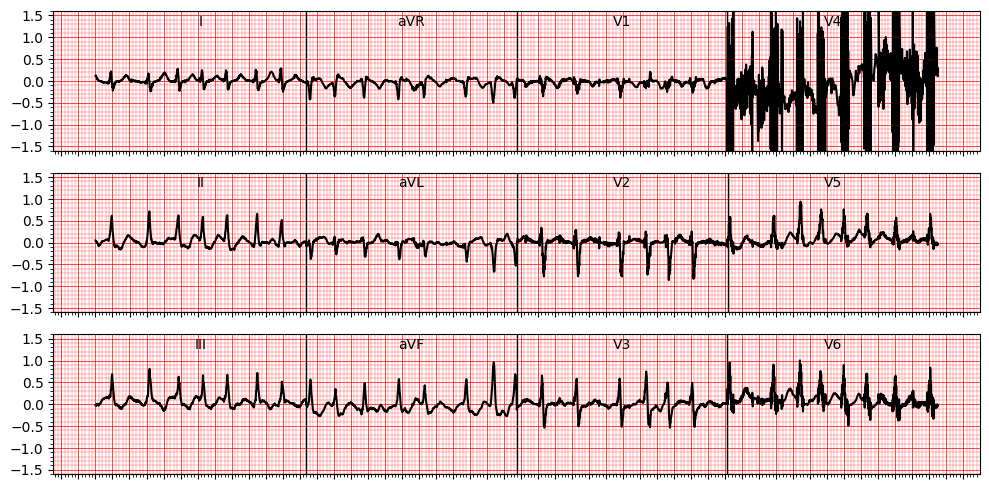


#####################################################################

efcb42391c.npy


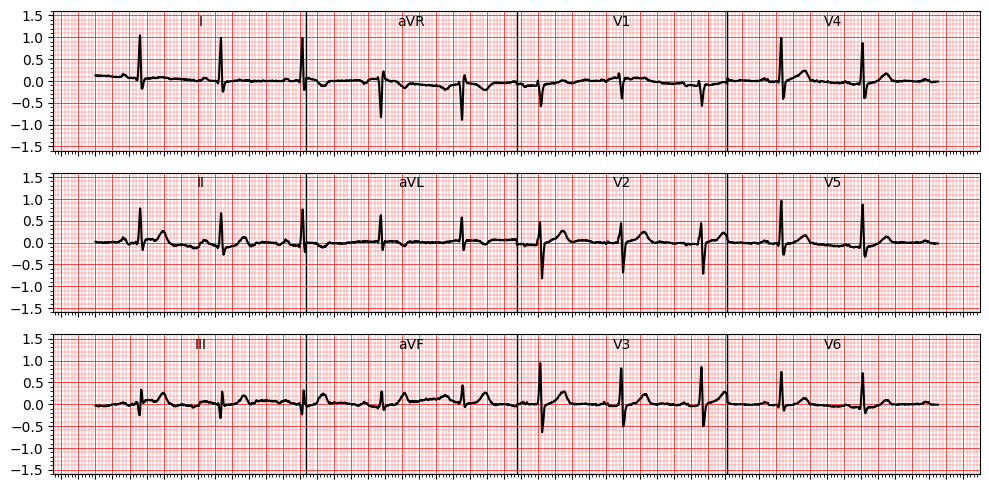


#####################################################################

7c38f3efe8.npy


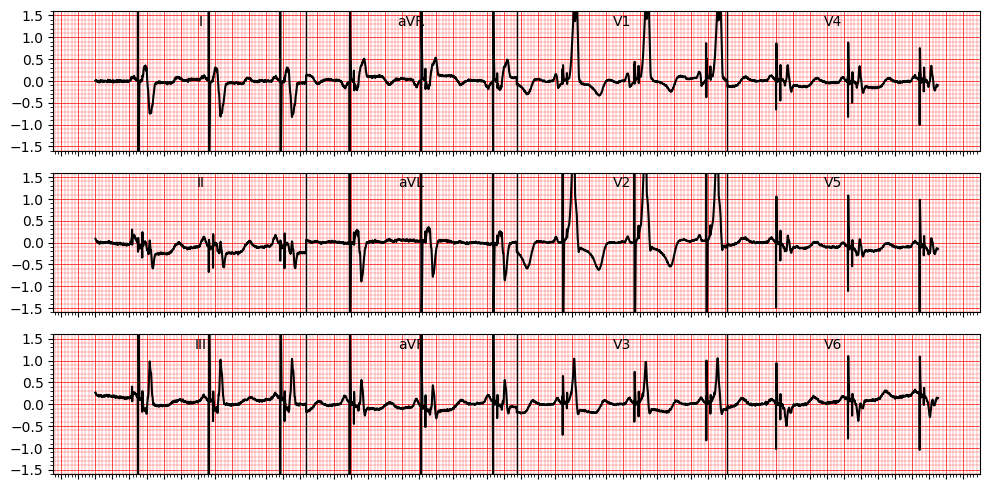


#####################################################################

e1c37ecb52.npy


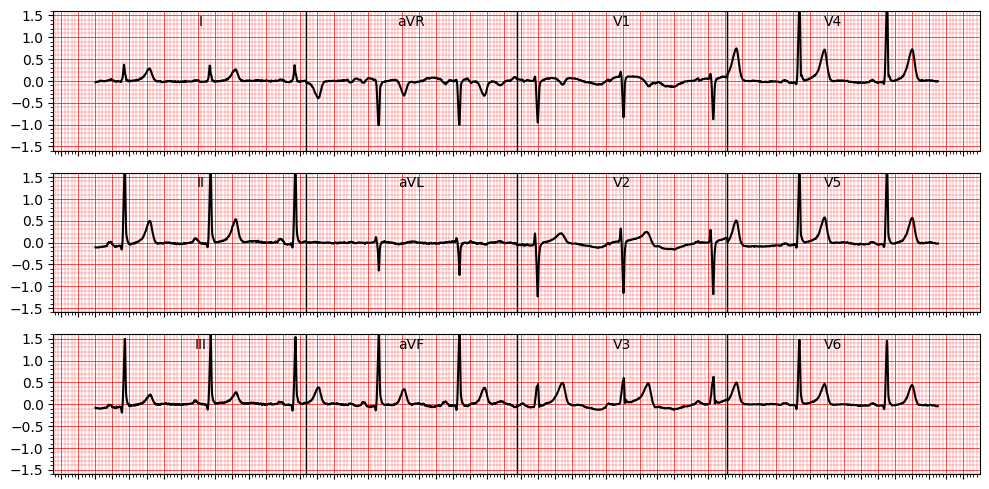


#####################################################################

011094c782.npy


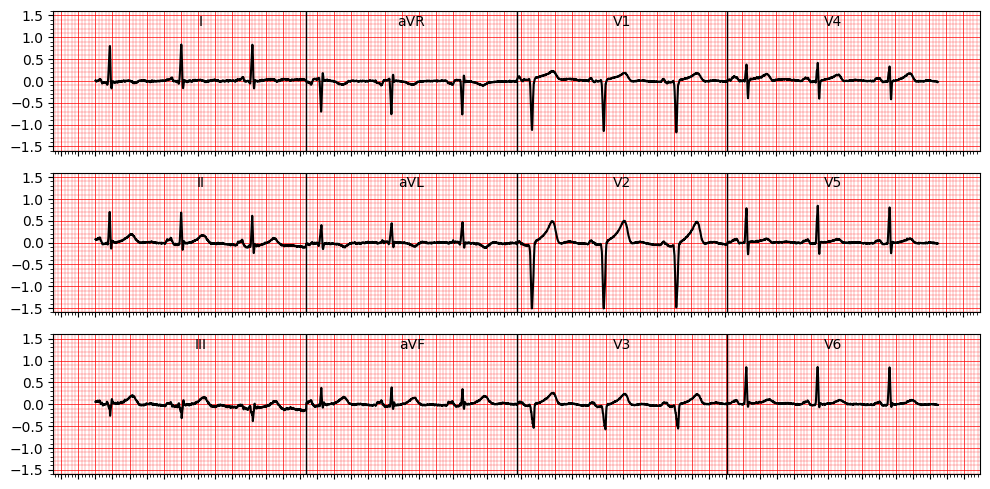


#####################################################################

1c625e36c5.npy


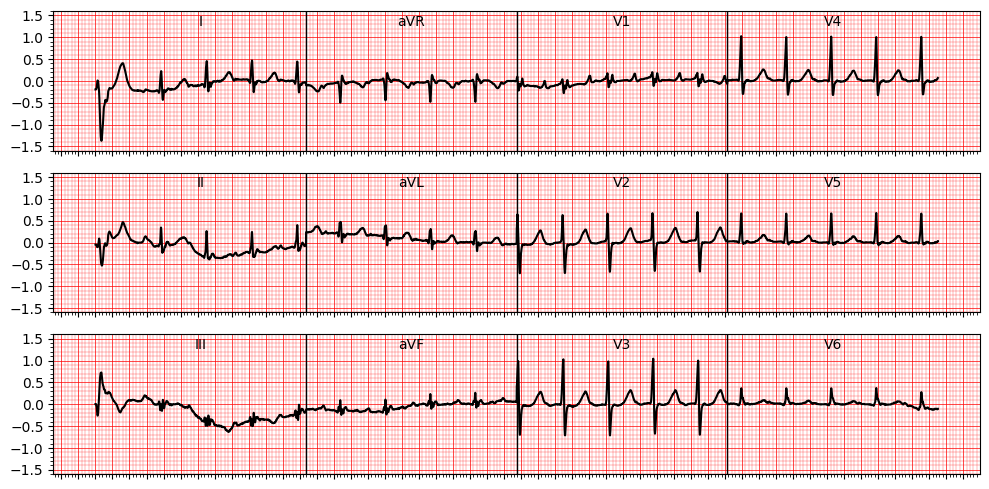


#####################################################################

42c6e3890e.npy


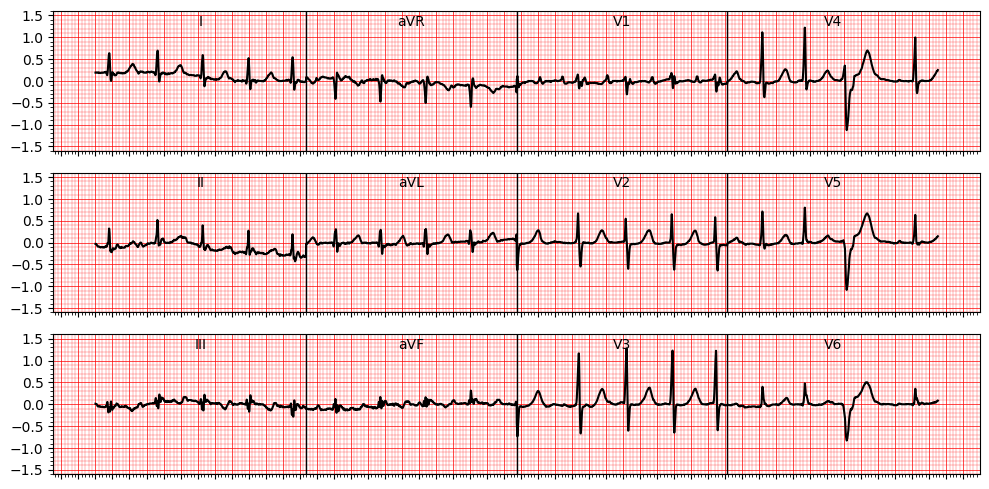


#####################################################################

0715da1eba.npy


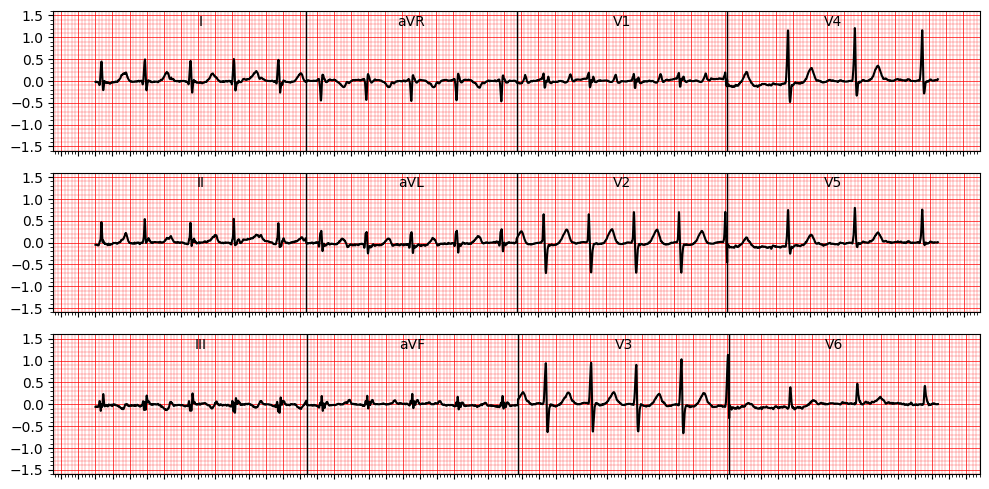


#####################################################################

4d3210bb08.npy


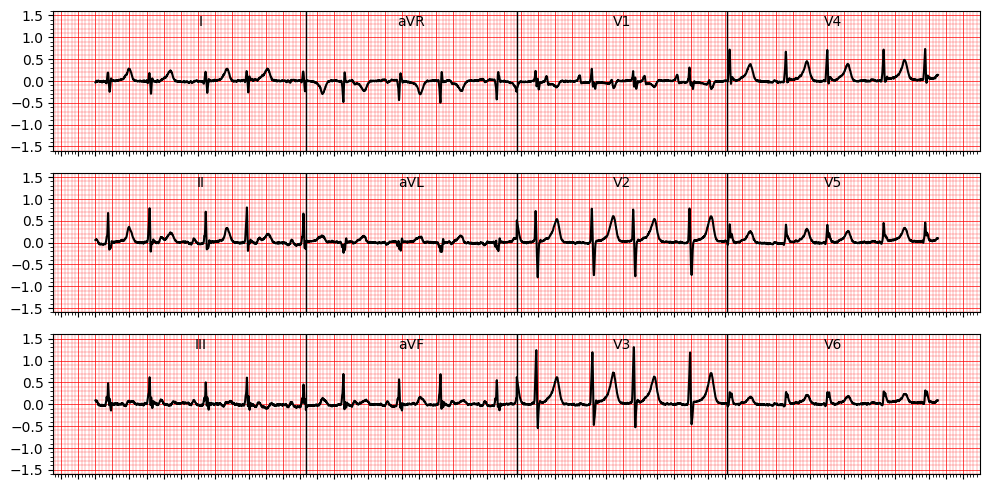


#####################################################################

237bd0d3d9.npy


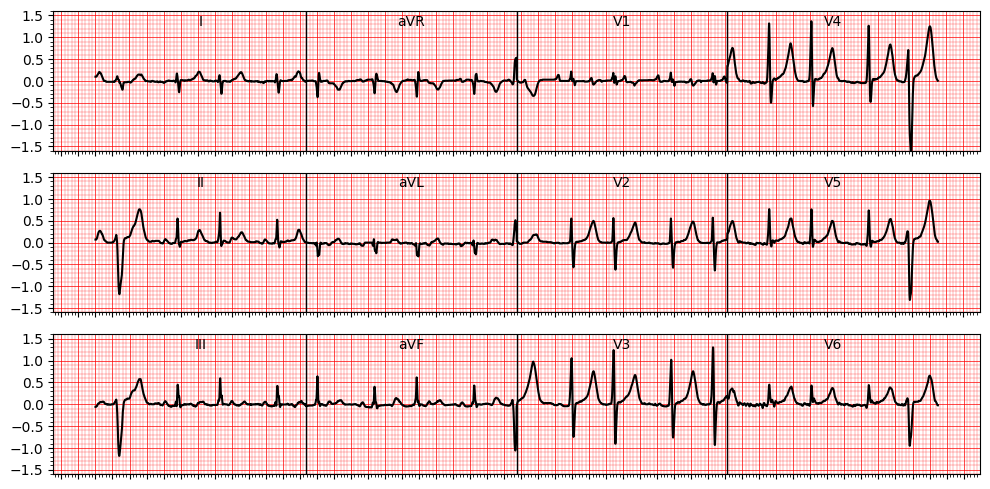


#####################################################################

11af30a611.npy


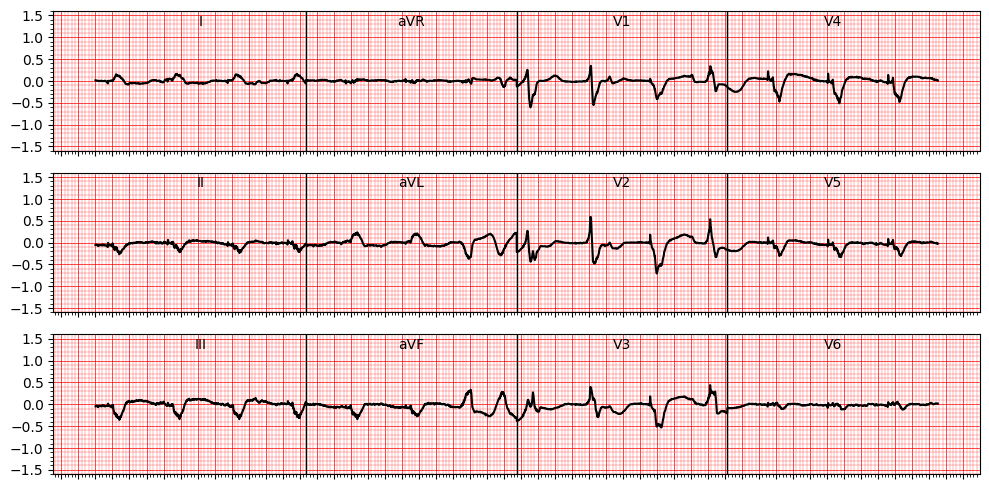


#####################################################################



In [34]:
# heartattack_df_ste_std_twi_ids = heartattack_df_ste_std_twi['ecg_id_new'].tolist()[10:12]
# heartattack_df_no_ste_std_twi_ids = heartattack_df_no_ste_std_twi['ecg_id_new'].tolist()[10:12]
# no_heartattack_df_ste_std_twi_ids = no_heartattack_df_ste_std_twi['ecg_id_new'].tolist()[10:12]
# no_heartattack_df_no_ste_std_twi_ids = no_heartattack_df_no_ste_std_twi['ecg_id_new'].tolist()[10:12]

print('No ACS without ECG feature')

for id_data in no_heartattack_df_no_ste_std_twi_ids:
    print(id_data)
    prefix = id_data[:2]
    id_data = id_data[:-4]
    arr = np.load(f'/home/ngsci/datasets/ed-bwh-ecg/v1/ecg-waveforms-npz/{prefix}/{id_data}.npz') #.npz #00385e09ac.npz #00177a731b.npz
    array_name = arr.files[0]  # Example: getting the first array name
    data = arr[array_name]
    plot_leads_as_on_pdf_new(data)
    print()
    print('#####################################################################')
    print()

In [ ]:
# heartattack_df_ste_std_twi_ids = heartattack_df_ste_std_twi['ecg_id_new'].tolist()[10:12]
# heartattack_df_no_ste_std_twi_ids = heartattack_df_no_ste_std_twi['ecg_id_new'].tolist()[10:12]
# no_heartattack_df_ste_std_twi_ids = no_heartattack_df_ste_std_twi['ecg_id_new'].tolist()[10:12]
# no_heartattack_df_no_ste_std_twi_ids = no_heartattack_df_no_ste_std_twi['ecg_id_new'].tolist()[10:12]

print('ACS with ECG feature')

for id_data in heartattack_df_ste_std_twi_ids:
    print(id_data)
    prefix = id_data[:2]
    id_data = id_data[:-4]
    arr = np.load(f'/home/ngsci/datasets/ed-bwh-ecg/v1/ecg-waveforms-npz/{prefix}/{id_data}.npz') #.npz #00385e09ac.npz #00177a731b.npz
    array_name = arr.files[0]  # Example: getting the first array name
    data = arr[array_name]
    plot_leads_as_on_pdf_new(data)
    print()
    print('#####################################################################')
    print()

5e1934b83d.npy


/tmp/ipykernel_880/3968183866.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(lead_without_nan, nan_policy='omit')[0][0]
/tmp/ipykernel_880/3968183866.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(lead_wit

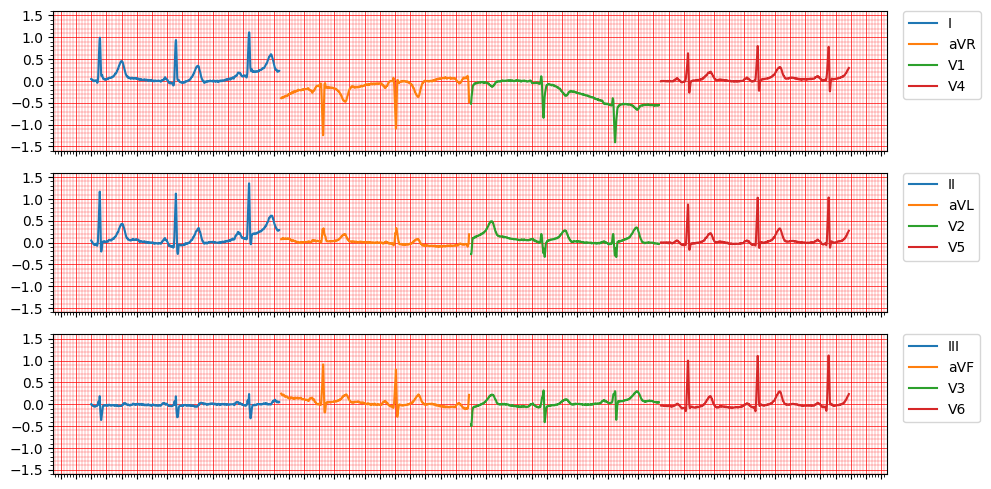


#####################################################################

51aa72c5fb.npy


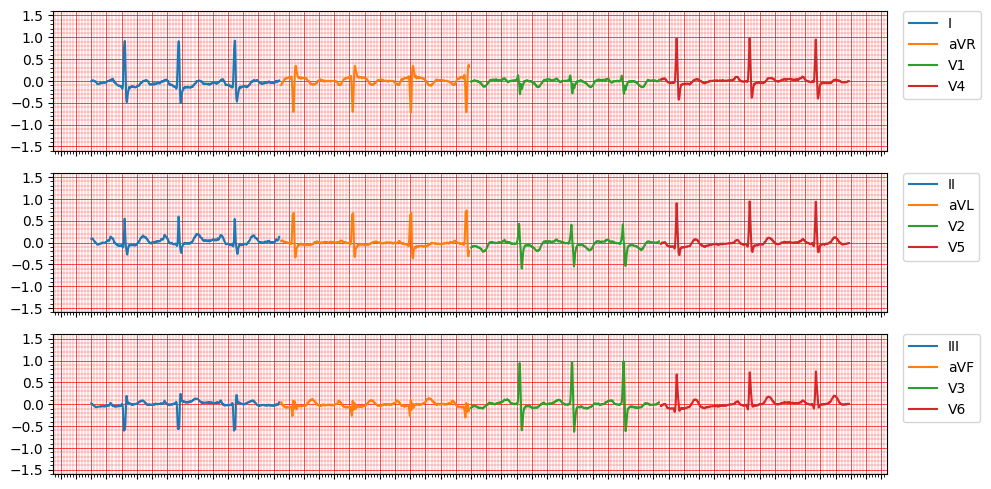


#####################################################################

69f9ee3ec0.npy


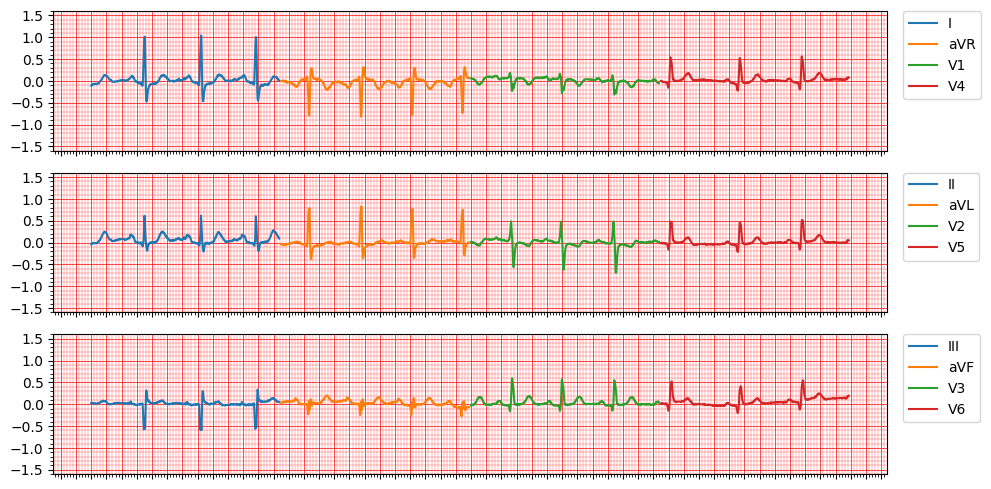


#####################################################################

4640dbd684.npy


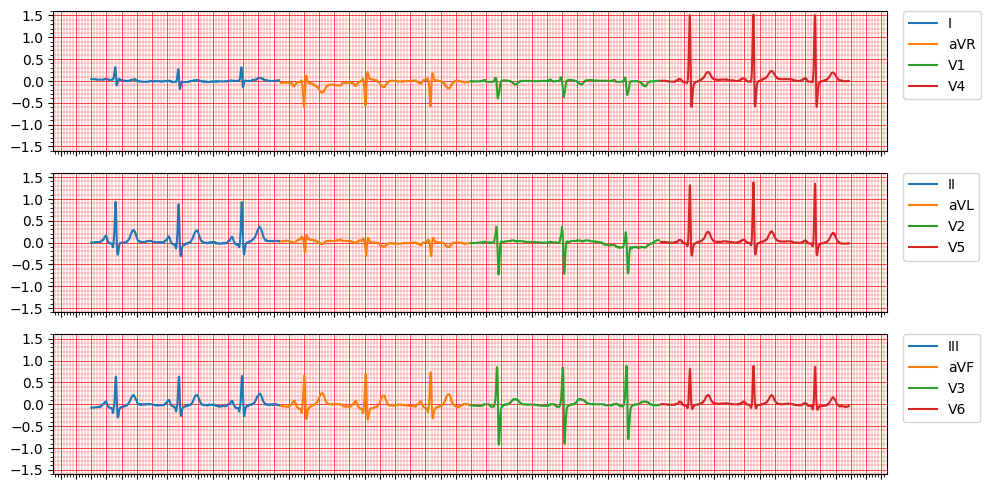


#####################################################################

5df616242e.npy


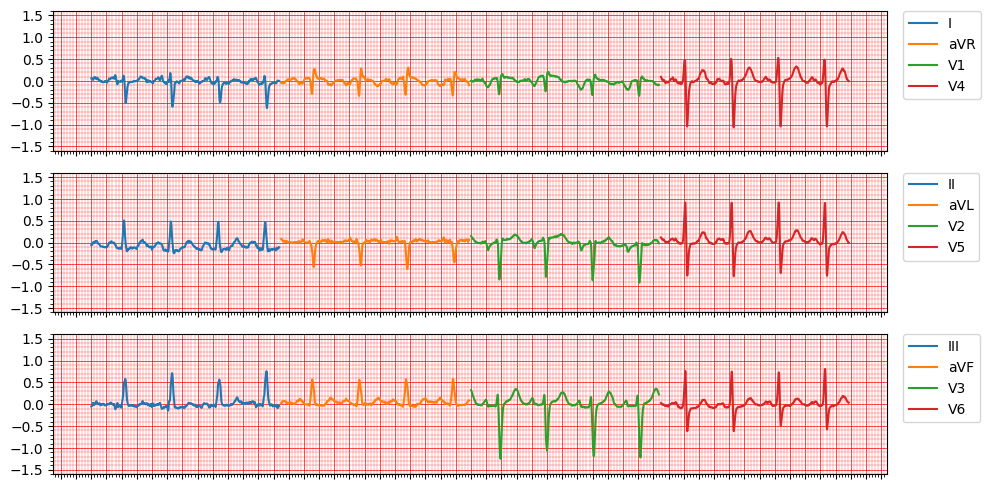


#####################################################################

bd0b339431.npy


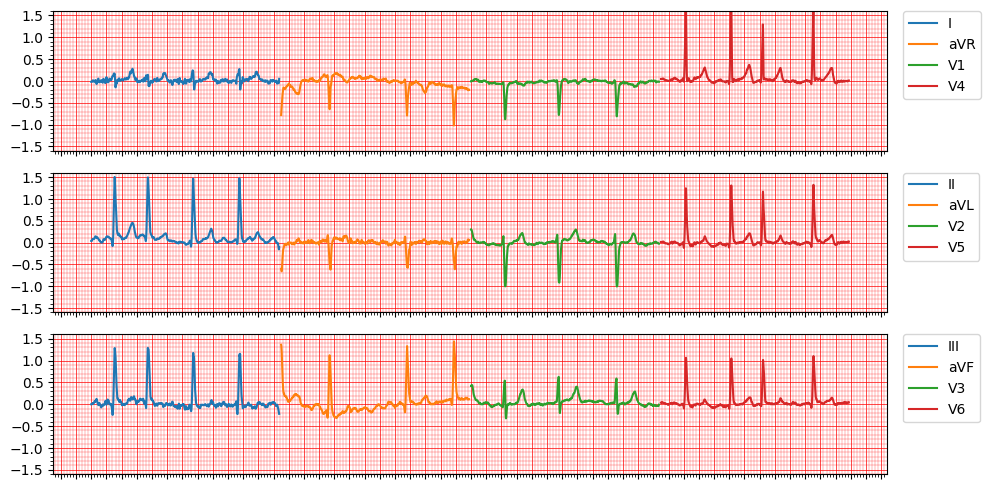


#####################################################################

679e0878ef.npy


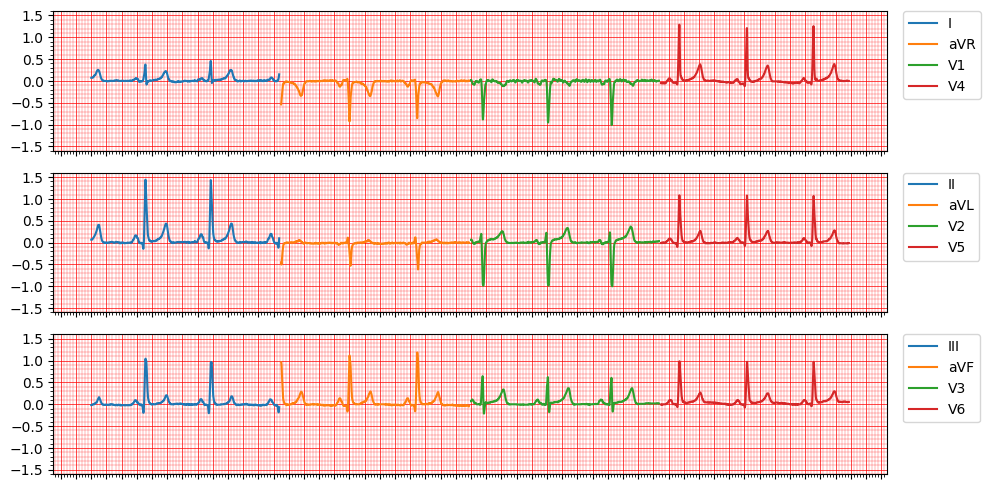


#####################################################################

04949d91cf.npy


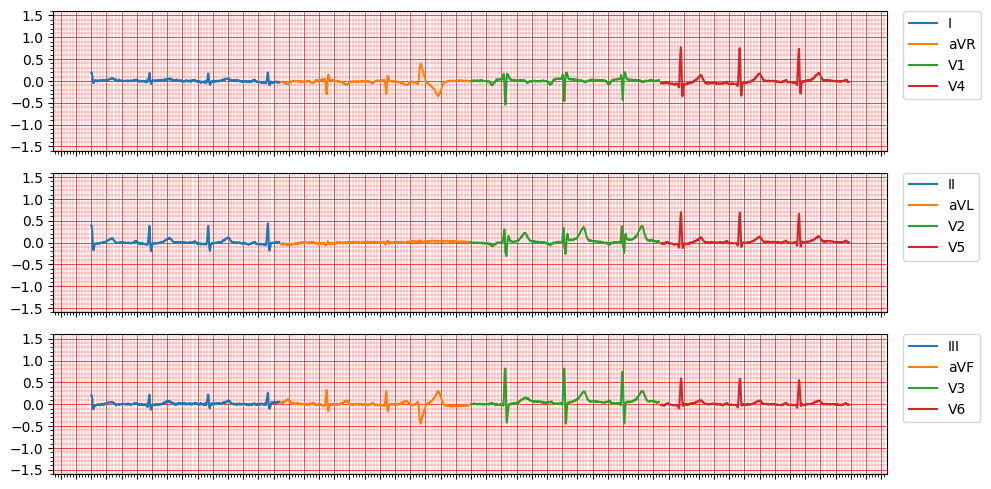


#####################################################################

6debd0d5a0.npy


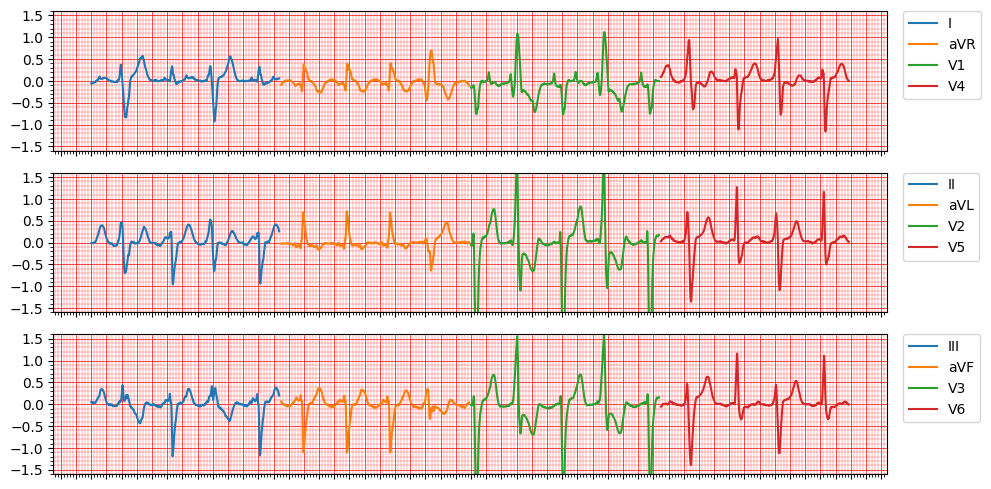


#####################################################################

08a3dfa7ba.npy


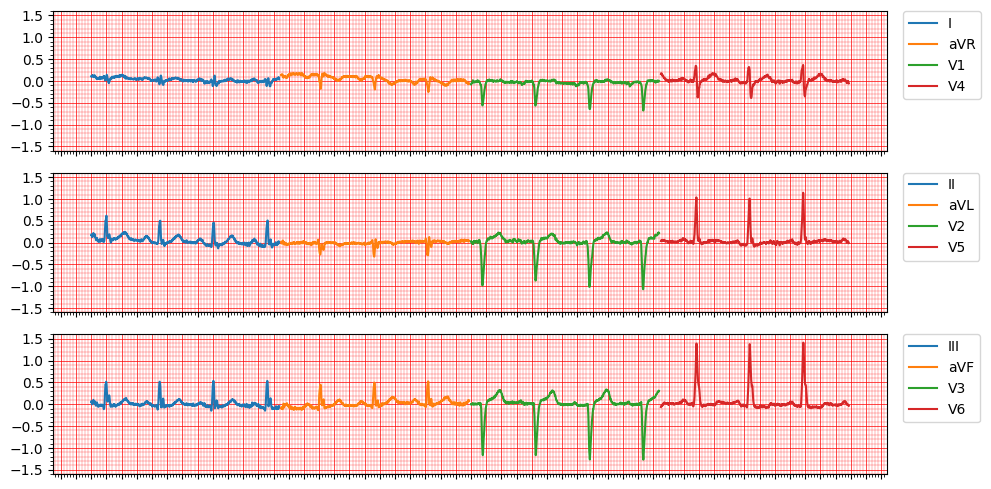


#####################################################################

54ab380ab9.npy


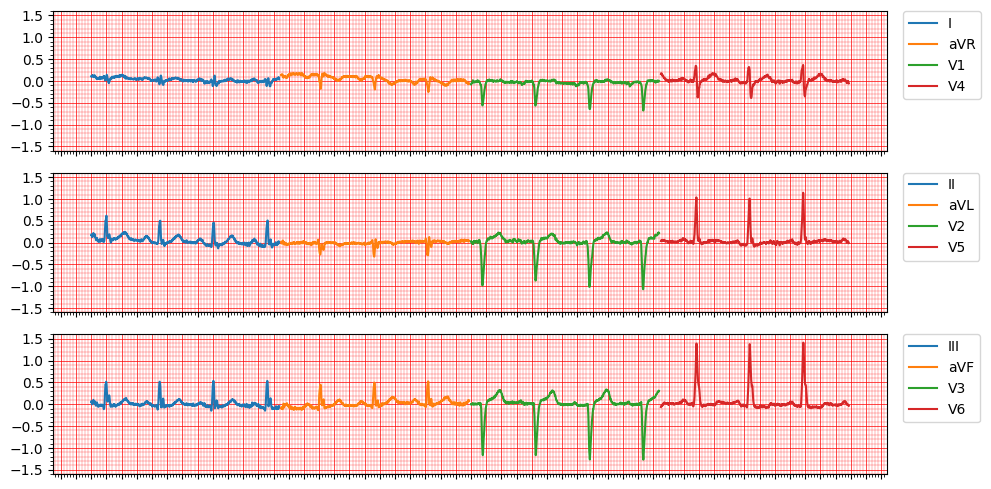


#####################################################################

6bbd791bd5.npy


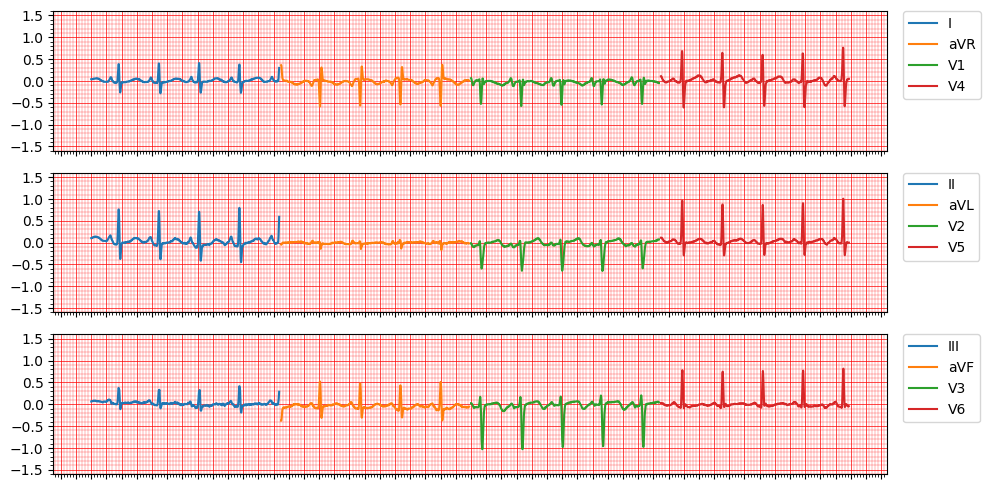


#####################################################################

271af5d387.npy


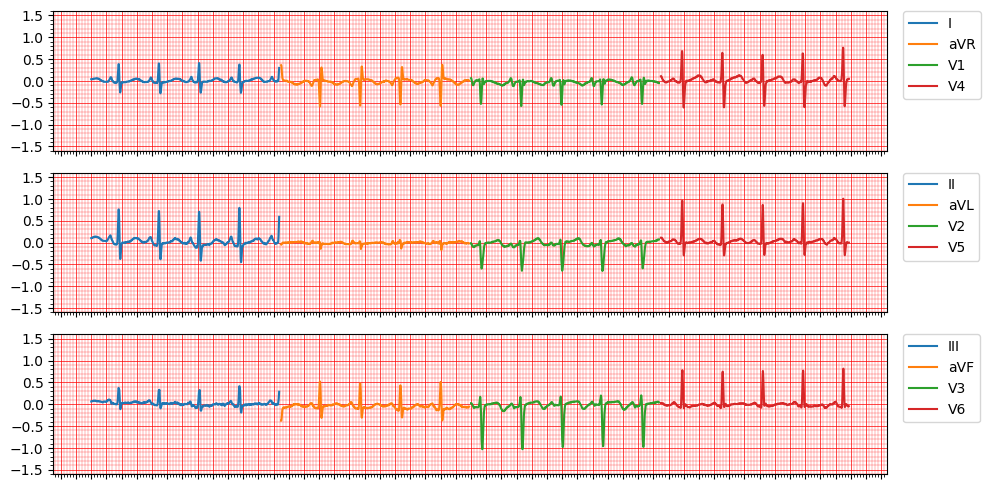


#####################################################################

605cc2a0a8.npy


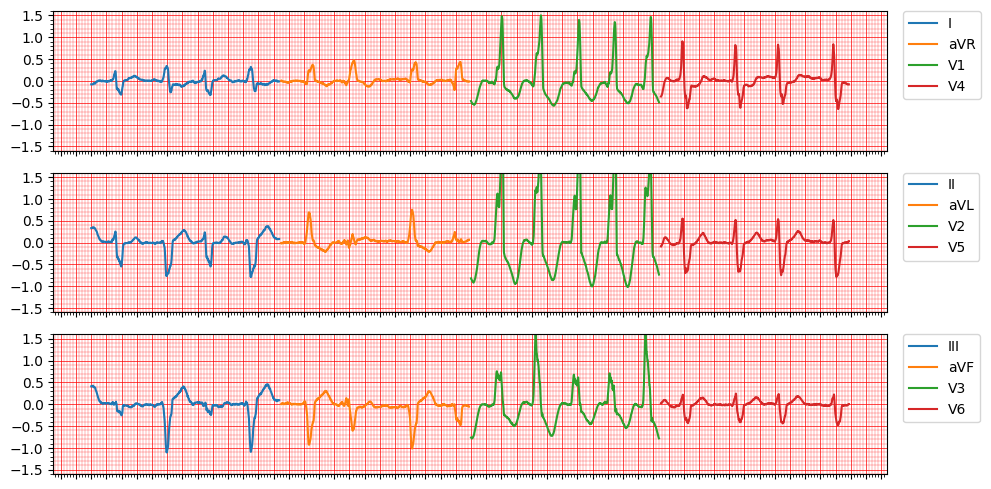


#####################################################################

edc0ee4d8a.npy


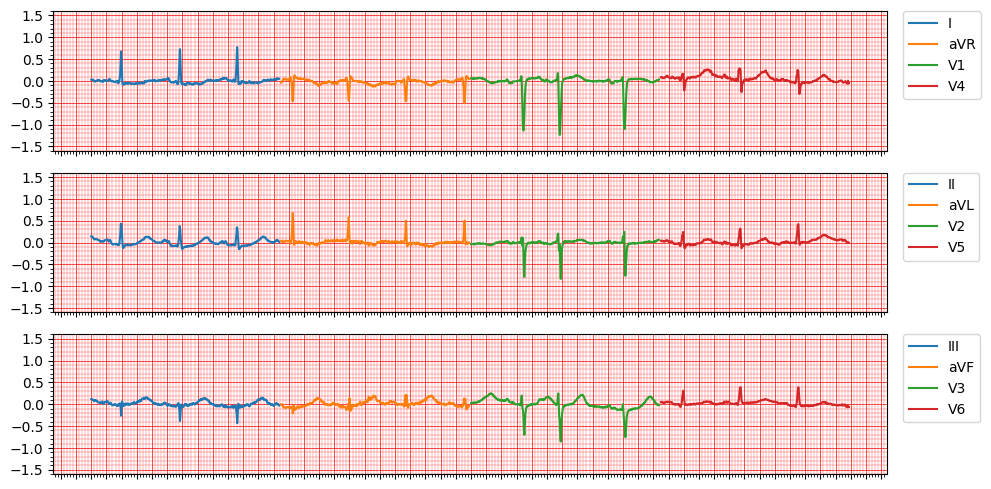


#####################################################################



In [15]:
for id_data in no_heartattack_df_ids:
    print(id_data)
    prefix = id_data[:2] 
    id_data = id_data[:-4]
    arr = np.load(f'/home/ngsci/datasets/ed-bwh-ecg/v1/ecg-waveforms-npz/{prefix}/{id_data}.npz') #00385e09ac.npz #00177a731b.npz
    array_name = arr.files[0]  # Example: getting the first array name
    data = arr[array_name]
    plot_leads_as_on_pdf_new(data)
    print()
    print('#####################################################################')
    print()

### Compare median beats

In [41]:
def load_ecg_data(ecg_ids):
    ecg_arrays = []
    for id_data in tqdm(ecg_ids):
        prefix = id_data[:2]
        id_data = id_data[:-4]
        arr = np.load(f'/home/ngsci/datasets/ed-bwh-ecg/v1/ecg-waveforms-npz/{prefix}/{id_data}.npz')
        array_name = arr.files[0]
        data = arr[array_name]
        ecg_arrays.append(data)
    return np.array(ecg_arrays)

def calculate_median_ecg(ecg_arrays):
    # Calculate the median across all ECG arrays
    print(ecg_arrays.shape)
    return np.nanmedian(ecg_arrays, axis=0)

def plot_median_ecgs(median_heartattack, median_no_heartattack):
    short_lead_labels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

    # Set up plot
    fig, axs = plt.subplots(3, 1, figsize=(10, 5))

    for i in range(3):
        for j, label in enumerate(short_lead_labels[i::3]):
            lead_heartattack = median_heartattack[j]
            lead_no_heartattack = median_no_heartattack[j]
            
            # print(lead_heartattack.max())
            # print(lead_no_heartattack.max())
            
            print(stats.mode(lead_heartattack[~np.isnan(lead_heartattack)], nan_policy='omit')[0])
            
            lead_heartattack = lead_heartattack - stats.mode(lead_heartattack[~np.isnan(lead_heartattack)], nan_policy='omit')[0]
            lead_no_heartattack = lead_no_heartattack - stats.mode(lead_no_heartattack[~np.isnan(lead_no_heartattack)], nan_policy='omit')[0]

            axs[i].plot(lead_heartattack, label=f'{label} (Heart Attack)', linestyle='-', alpha=0.8)
            axs[i].plot(lead_no_heartattack, label=f'{label} (No Heart Attack)', linestyle='--', alpha=0.8)

    # Customize gridlines to mimic ECG paper
    for ax in axs:
        ax.set_ylim(-1.6, 1.6)
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_minor_locator(MultipleLocator(20))
        ax.yaxis.set_minor_locator(MultipleLocator(0.1))

        ax.grid(which='major', color='red', linestyle='-', linewidth=0.5)
        ax.grid(which='minor', color='red', linestyle='-', linewidth=0.2)
        ax.set_facecolor('white')

        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)
        ax.tick_params(axis='x', which='major', labelbottom=False)
        ax.tick_params(axis='x', which='minor', labelbottom=False)

    plt.tight_layout()
    plt.show()

In [23]:
# Load test dataframe
test_df = pd.read_csv("/home/ngsci/project/NEJM_benchmark/all_ids_labels_tested_with_covars.csv")

# Filter the heart attack and no heart attack dataframes
heartattack_df = test_df[test_df['stent_or_cabg_010_day'] == 1]
no_heartattack_df = test_df[test_df['stent_or_cabg_010_day'] == 0]

# Extract the ECG IDs for median calculation
heartattack_df_ids = heartattack_df['ecg_id_new'].tolist()
no_heartattack_df_ids = no_heartattack_df['ecg_id_new'].tolist()

# Load ECG data for both groups
ecgs_heartattack = load_ecg_data(heartattack_df_ids)
ecgs_no_heartattack = load_ecg_data(no_heartattack_df_ids)



100%|██████████| 5911/5911 [00:16<00:00, 359.82it/s]


(1299, 15, 5000)
(5911, 15, 5000)


In [75]:
i = 300
print(median_heartattack.shape)
print(ecgs_heartattack.shape)
print(ecgs_heartattack[:,0].shape)
print(np.nanmean(ecgs_heartattack[:,0,i]))
print(median_heartattack[0][i])

(15, 5000)
(1299, 15, 5000)
(1299, 5000)
0.004965357967667436
-0.015


In [44]:
# Calculate median ECGs
median_heartattack = calculate_median_ecg(ecgs_heartattack)
median_no_heartattack = calculate_median_ecg(ecgs_no_heartattack)

(1299, 15, 5000)
(5911, 15, 5000)


In [51]:
print(median_heartattack.shape)
def plot_heartattack_median_channels(median_heartattack):
    channel_labels = [f'Channel {i+1}' for i in range(15)]

    # Set up plot with 15 subplots
    fig, axs = plt.subplots(15, 1, figsize=(15, 30), sharex=True)

    for i in range(15):
        channel_data = median_heartattack[i]
        channel_data = channel_data - stats.mode(channel_data[~np.isnan(channel_data)], nan_policy='omit')[0][0]
        axs[i].plot(channel_data, label=channel_labels[i], linestyle='-', alpha=0.8)

        # Customize gridlines to mimic ECG paper
        axs[i].set_ylim(-1.6, 1.6)
        axs[i].xaxis.set_major_locator(MultipleLocator(100))
        axs[i].yaxis.set_major_locator(MultipleLocator(0.5))
        axs[i].xaxis.set_minor_locator(MultipleLocator(20))
        axs[i].yaxis.set_minor_locator(MultipleLocator(0.1))

        axs[i].grid(which='major', color='red', linestyle='-', linewidth=0.5)
        axs[i].grid(which='minor', color='red', linestyle='-', linewidth=0.2)
        axs[i].set_facecolor('white')

        axs[i].legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)
        axs[i].tick_params(axis='x', which='major', labelbottom=False)
        axs[i].tick_params(axis='x', which='minor', labelbottom=False)

    # Only show labels on the bottom subplot
    axs[-1].tick_params(axis='x', which='major', labelbottom=True)

    plt.tight_layout()
    plt.show()

# print(ecgs_heartattack[400][0][500:1500])
#print(median_heartattack[0][500:1500])
    
#plot_heartattack_median_channels(median_heartattack)


(15, 5000)
[-0.029 -0.029 -0.029 -0.029 -0.024 -0.024 -0.024 -0.02  -0.02  -0.02
 -0.02  -0.015 -0.02  -0.029 -0.034 -0.044 -0.049 -0.044 -0.044 -0.049
 -0.044 -0.034 -0.034 -0.034 -0.02  -0.01  -0.01  -0.01  -0.02  -0.029
 -0.034 -0.044 -0.039 -0.024 -0.015 -0.01  -0.015 -0.024 -0.029 -0.034
 -0.044 -0.049 -0.044 -0.034 -0.029 -0.029 -0.029 -0.039 -0.039 -0.029
 -0.02  -0.015 -0.015 -0.024 -0.029 -0.034 -0.049 -0.059 -0.059 -0.059
 -0.059 -0.044 -0.024 -0.01  -0.01  -0.02  -0.029 -0.039 -0.044 -0.034
 -0.024 -0.02  -0.015 -0.01  -0.005 -0.005 -0.015 -0.024 -0.029 -0.024
 -0.02  -0.015 -0.015 -0.015 -0.015 -0.02  -0.024 -0.029 -0.024 -0.02
 -0.015 -0.005 -0.005 -0.02  -0.029 -0.039 -0.029 -0.024 -0.024 -0.024
 -0.024 -0.015 -0.01   0.     0.005  0.005 -0.01  -0.034 -0.034 -0.024
 -0.024 -0.02  -0.01   0.    -0.005 -0.005  0.     0.005  0.005  0.
  0.005  0.02   0.024  0.034  0.039  0.044  0.044  0.054  0.059  0.059
  0.059  0.054  0.059  0.068  0.073  0.073  0.073  0.059  0.054  0.054


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import stats
from tqdm import tqdm
import biosppy



def load_ecg_data(ecg_ids):
    ecg_arrays = []
    for id_data in tqdm(ecg_ids):
        prefix = id_data[:2]
        id_data = id_data[:-4]
        arr = np.load(f'/home/ngsci/datasets/ed-bwh-ecg/v1/ecg-waveforms-npz/{prefix}/{id_data}.npz')
        array_name = arr.files[0]
        data = arr[array_name]
        ecg_arrays.append(data)
    return np.array(ecg_arrays)

def calculate_median_beats(ecg_arrays):
    median_beats_list = []
    samples_around_r_peak = 250  # 250 samples before and after the R-peak, total 500

    for data in tqdm(ecg_arrays):
        median_beats = np.zeros((12, 500))
        valid_ecg = True

        for i in range(12):
            lead_data = data[i, :]
            lead_data = lead_data[~np.isnan(lead_data)]
            try:
                ecg_out = biosppy.signals.ecg.ecg(signal=lead_data, sampling_rate=500, show=False)
                r_peaks = ecg_out['rpeaks']
            except Exception as e:
                #print(f"Error detecting R-peaks for lead {i}: {e}")
                valid_ecg = False
                break

            beats = []
            for r_peak in r_peaks:
                if r_peak > samples_around_r_peak and r_peak + samples_around_r_peak < len(lead_data):
                    beat = lead_data[r_peak - samples_around_r_peak:r_peak + samples_around_r_peak]
                    beats.append(beat)

            if len(beats) > 0:
                median_beat = np.median(beats, axis=0)
                median_beats[i, :] = median_beat
            else:
                #print(f"Lead {i} does not have enough complete beats for median calculation.")
                valid_ecg = False
                break

        if valid_ecg:
            median_beats_list.append(median_beats)

    return np.array(median_beats_list)

def calculate_median_ecg_from_beats(median_beats_list):
    # Calculate the median across all median beats while ignoring NaNs
    return np.nanmedian(median_beats_list, axis=0)

def plot_median_ecgs(median_heartattack, median_no_heartattack):
    short_lead_labels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

    # Set up plot with 12 subplots
    fig, axs = plt.subplots(4, 3, figsize=(12, 10))

    for i in range(12):
        lead_heartattack = median_heartattack[i]
        lead_no_heartattack = median_no_heartattack[i]

        ax = axs[i // 3, i % 3]
        ax.plot(lead_heartattack, label=f'{short_lead_labels[i]} (Heart Attack)', linestyle='-', alpha=0.8)
        ax.plot(lead_no_heartattack, label=f'{short_lead_labels[i]} (No Heart Attack)', linestyle='-', alpha=0.8)

        # Customize gridlines to mimic ECG paper
        #ax.set_ylim(-1.6, 1.6)
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_minor_locator(MultipleLocator(20))
        ax.yaxis.set_minor_locator(MultipleLocator(0.1))

        #ax.grid(which='major', color='red', linestyle='-', linewidth=0.5)
        #ax.grid(which='minor', color='red', linestyle='-', linewidth=0.2)
        ax.set_facecolor('white')

        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0), borderaxespad=0.)
        ax.tick_params(axis='x', which='major', labelbottom=False)
        ax.tick_params(axis='x', which='minor', labelbottom=False)

    # Only show labels on the bottom row
    for ax in axs[-1, :]:
        ax.tick_params(axis='x', which='major', labelbottom=True)

    plt.tight_layout()
    plt.show()


# Load test dataframe
test_df = pd.read_csv("/home/ngsci/project/NEJM_benchmark/all_ids_labels_tested_with_covars_all.csv")

# Filter the heart attack and no heart attack dataframes
heartattack_df = test_df[test_df['stent_or_cabg_010_day'] == 1]
no_heartattack_df = test_df[test_df['stent_or_cabg_010_day'] == 0]

# Extract the ECG IDs for median calculation
heartattack_df_ids = heartattack_df['ecg_id_new'].tolist()
no_heartattack_df_ids = no_heartattack_df['ecg_id_new'].tolist()
    
# Load ECG data for both groups
ecgs_heartattack = load_ecg_data(heartattack_df_ids)
ecgs_no_heartattack = load_ecg_data(no_heartattack_df_ids)

# Calculate median beats for each ECG
median_beats_heartattack = calculate_median_beats(ecgs_heartattack)
median_beats_no_heartattack = calculate_median_beats(ecgs_no_heartattack)

# Calculate median ECGs from the median beats
median_heartattack = calculate_median_ecg_from_beats(median_beats_heartattack)
median_no_heartattack = calculate_median_ecg_from_beats(median_beats_no_heartattack)

# Plot median ECGs
plot_median_ecgs(median_heartattack, median_no_heartattack)

 79%|███████▊  | 6503/8272 [01:02<00:16, 104.83it/s]


KeyboardInterrupt: 

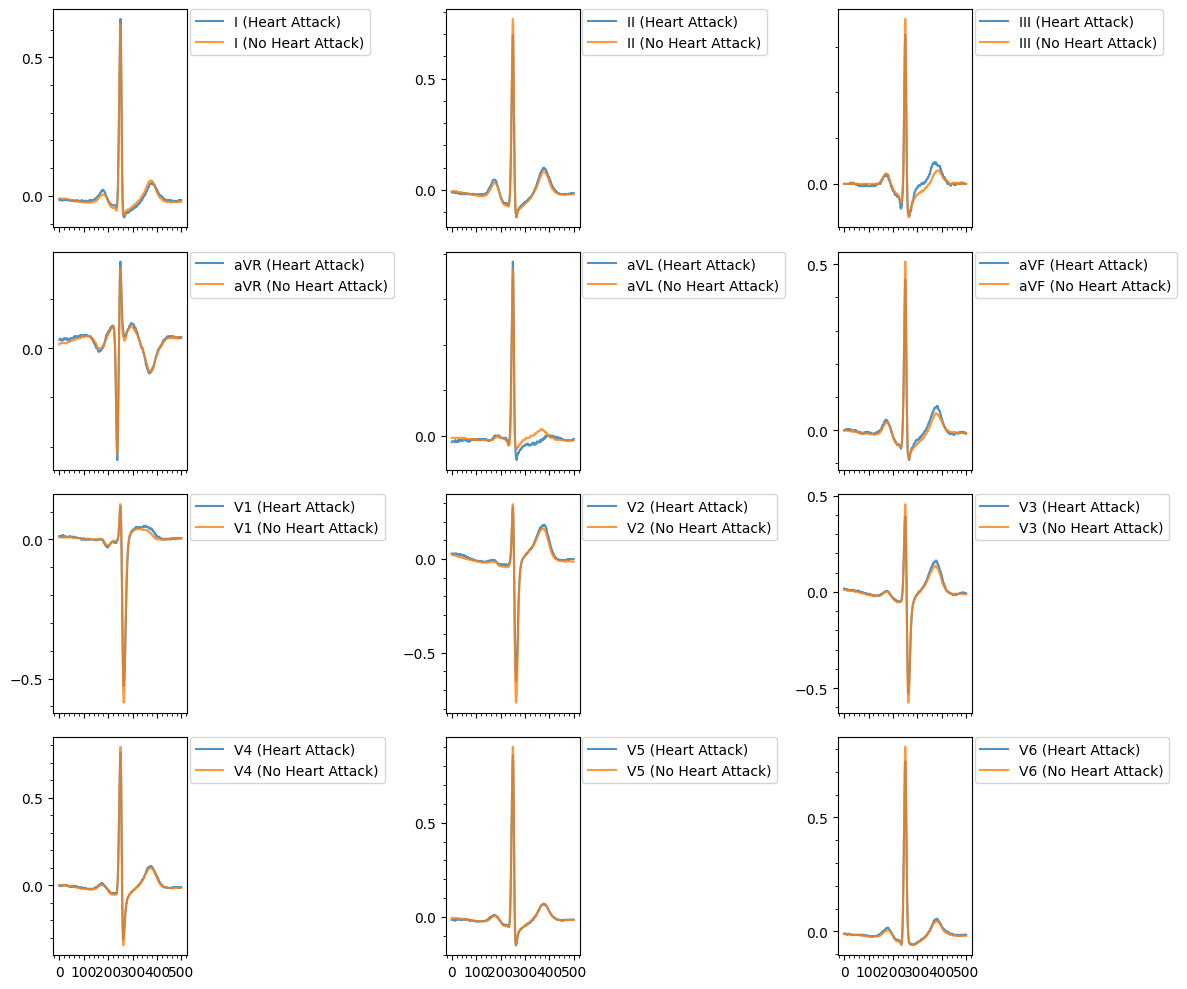

In [88]:
# Load test dataframe
test_df = pd.read_csv("/home/ngsci/project/NEJM_benchmark/all_ids_labels_untested_with_covars_all.csv")
#test_df['ecg_id_new'] = test_df['ecg_id'].str.replace('.npy', '', regex=False)
test_df['ecg_id_new'] = test_df['ecg_id_new'].str.replace('ecg', '', regex=False)
display(test_df[['ecg_id','ecg_id_new']].head())

# Filter the heart attack and no heart attack dataframes
heartattack_df = test_df[test_df['macetrop_pos_or_death_030'] == 1]
no_heartattack_df = test_df[test_df['macetrop_pos_or_death_030'] == 0]

# Extract the ECG IDs for median calculation
heartattack_df_ids = heartattack_df['ecg_id_new'].tolist()
no_heartattack_df_ids = no_heartattack_df['ecg_id_new'].tolist()
    
# Load ECG data for both groups
ecgs_heartattack = load_ecg_data(heartattack_df_ids)
ecgs_no_heartattack = load_ecg_data(no_heartattack_df_ids)

# Calculate median beats for each ECG
median_beats_heartattack = calculate_median_beats(ecgs_heartattack)
median_beats_no_heartattack = calculate_median_beats(ecgs_no_heartattack)

# Calculate median ECGs from the median beats
median_heartattack = calculate_median_ecg_from_beats(median_beats_heartattack)
median_no_heartattack = calculate_median_ecg_from_beats(median_beats_no_heartattack)

ecg_id  ecg_id_new
0  ecg3906f61865.npy  3906f61865
1  ecg6bddcf866d.npy  6bddcf866d
2  ecgd49df1c4de.npy  d49df1c4de
3  ecge5331658a6.npy  e5331658a6
4  ecg929fa6f6d4.npy  929fa6f6d4

  0%|          | 0/13317 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/home/ngsci/datasets/ed-bwh-ecg/v1/ecg-waveforms-npz/07/0705cc.npz'

In [87]:
test_df = pd.read_csv("/home/ngsci/project/NEJM_benchmark/all_ids_labels_tested_with_covars_all.csv")
display(test_df[['ecg_id','ecg_id_new']].head())

ecg_id      ecg_id_new
0  ecg162c83f05d  162c83f05d.npy
1  ecg86065367ee  86065367ee.npy
2  ecgdd0d198786  dd0d198786.npy
3  ecgcafc2054f7  cafc2054f7.npy
4  ecgde93ebc234  de93ebc234.npy